# Jupyter Notebook Python3 Dataset

In [82]:
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn import linear_model 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
#oversampling libraries and methods
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,
plot_confusion_matrix,classification_report

## Import csv

In [2]:
Leads = pd.read_csv("20220202_Leads_LCV.csv")
Leads

,COD_PERSONA_CLIMAPRO_I,PROSPECTS_2015,LEADS_2015,PROSPECTS_2016,LEADS_2016,PROSPECTS_2017,LEADS_2017,PROSPECTS_2018,LEADS_2018,PROSPECTS_2019,LEADS_2019,PROSPECTS_2020,LEADS_2020,PROSPECTS_2021,LEADS_2021
0,9108300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9150664,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9151144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3340674,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7202548,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592844,240779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
592845,1410945,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0
592846,7490678,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
592847,8784267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0


In [3]:
Ors = pd.read_csv("20220202_ors_LCV.csv")
Ors

,COD_VEHICULO_CLIMAPRO,IMPORTE_TOTAL_ORS_2015,NUM_ORS_2015,IMPORTE_TOTAL_ORS_2016,NUM_ORS_2016,IMPORTE_TOTAL_ORS_2017,NUM_ORS_2017,IMPORTE_TOTAL_ORS_2018,NUM_ORS_2018,IMPORTE_TOTAL_ORS_2019,NUM_ORS_2019,IMPORTE_TOTAL_ORS_2020,NUM_ORS_2020,IMPORTE_TOTAL_ORS_2021,NUM_ORS_2021
0,2011078,1736.08,2.0,2265.91,2.0,NaN,NaN,1200.21,1.0,NaN,NaN,NaN,NaN,343.71,2.0
1,1855888,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023151,8091.77,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023528,NaN,NaN,64.92,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2033281,5.03,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1301.33,2.0,986.93,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212044,5745832,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
212045,6486051,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
212046,6550543,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
212047,6384140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.30,1.0


In [4]:
Clientes = pd.read_csv("20220202_Clientes_LCV.csv")
Clientes

,COD_VEHICULO_CLIMAPRO,FECHA_ULT_REPARACION,FLAG_FINANCIADO,COD_MODELO,FLAG_MODELO_1,FLAG_MODELO_2,FLAG_MODELO_3,FLAG_MODELO_4,FLAG_MODELO_5,FLAG_MODELO_6,...,FLAG_VENTA_VN_COLECTIVO,FLAG_VENTA_VN_EMPLEADO,FLAG_VENTA_VN_FLOTA,FLAG_VENTA_VN_NA,FLAG_VENTA_VN_OTROS,FLAG_VENTA_VN_PERSONA,FLAG_VENTA_VN_RENTING,FLAG_VENTA_VN_TAXI,FLAG_VENTA_VN_VO,FLAG_PEDIDO_VN
0,1876800,2022-01-18 00:58:16,0.0,4.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1859616,2017-07-04 10:31:58,0.0,NaN,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1859616,2017-07-04 10:31:58,0.0,NaN,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1879613,NaN,0.0,NaN,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1983571,NaN,0.0,NaN,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594682,2043467,2022-01-12 00:59:24,0.0,3.0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
594683,2043467,2022-01-12 00:59:24,0.0,3.0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
594684,2043467,2022-01-12 00:59:24,0.0,3.0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
594685,2043467,2022-01-12 00:59:24,0.0,3.0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


#### Merge DataFrames

In [5]:
df1=Clientes.merge(Leads, how='left', on='COD_PERSONA_CLIMAPRO_I')
df= df1.merge(Ors, how='left', on='COD_VEHICULO_CLIMAPRO')
#Show all columns
pd.set_option('display.max_columns', None)
df.drop_duplicates(inplace = True)
df.dropna(how='all', axis=1, inplace=True)
df

,COD_VEHICULO_CLIMAPRO,FECHA_ULT_REPARACION,FLAG_FINANCIADO,COD_MODELO,FLAG_MODELO_1,FLAG_MODELO_2,FLAG_MODELO_3,FLAG_MODELO_4,FLAG_MODELO_5,FLAG_MODELO_6,FLAG_MODELO_7,FLAG_MODELO_8,FLAG_DIESEL,FLAG_GASOLINA,FLAG_GASOLINA_GAS,PESO_VEHICULO_SLI,FECHA_MATRICULACION,KILOMETRAJE,NUM_OPCIONALES_SLI,COD_PERSONA_CLIMAPRO_I,COD_VEHICULO_CLIMAPRO.1,FECHA_BAJA_CONS,FLAG_RELACION_ACTIVA,FECHA_ALTA_CONS,FLAG_ES_VO,FLAG_UNIVERSO_CONTACTABLE,COD_FINANCIACION,FLAG_CLIENTE_AUTONOMO,FLAG_CLIENTE_LABORAL,FLAG_CLIENTE_PARTICULAR,FLAG_CLIENTE_OTROS,COD_PERSONA_CLIMAPRO_I.1,FLAG_ANDALUCIA,FLAG_ARAGON,FLAG_ASTURIAS,FLAG_ILLES_BALEARS,FLAG_CANARIAS,FLAG_CANTABRIA,FLAG_CASTILLA_LEON,FLAG_CASTILLA_LAMANCHA,FLAG_CATALUNYA,FLAG_VALENCIA,FLAG_EXTREMADURA,FLAG_GALICIA,FLAG_MADRID,FLAG_MURCIA,FLAG_NAVARRA,FLAG_PAIS_VASCO,FLAG_LA_RIOJA,FLAG_CEUTA_MELILLA,FLAG_HOMBRE,FLAG_MUJER,FLAG_EMPRESA,FLAG_PERSONA_FISICA,COD_PERSONA_CLIMAPRO_I.2,EDAD,FLAG_AFECTADO_EMI,COD_VEHICULO_CLIMAPRO.2,FLAG_LIFE,NUM_ORS_ULTIMO_ANYO,MESES_DESDE_MATRICULACION,POTENCIA_CV,NUM_ORS_MANT_ULTIMO_ANYO,FECHA_ULTIMA_OR_MANT,FLAG_3500KG,FECHA_ALTA_LONGDRIVE,FECHA_ULTIMA_OR,KM_ESTIMADO,COD_PERSONA_CLIMAPRO_I.3,FLAG_CLIENTE_REGISTRADO,FLAG_AUTONOMO,FLAG_CLIENTE,FLAG_EXCLIENTE,FLAG_PROSPECT_MENOR_6MESES,FLAG_LEAD_MENOR_6MESES,FLAG_MULTIVEHICULO,FLAG_NEGOCIACION_RED,FLAG_OFERTA_IMA,NUM_VEHICULOS_CONDUCTOR,NUM_VEHICULOS_PROPIETARIO,FLAG_CLIENTE_INSATISFECHO,COD_VEHICULO_CLIMAPRO.3,ANYOS_DESDE_ENTREGA,FLAG_FLOTA,FLAG_VENTA_VN_COLECTIVO,FLAG_VENTA_VN_EMPLEADO,FLAG_VENTA_VN_FLOTA,FLAG_VENTA_VN_NA,FLAG_VENTA_VN_OTROS,FLAG_VENTA_VN_PERSONA,FLAG_VENTA_VN_RENTING,FLAG_VENTA_VN_TAXI,FLAG_VENTA_VN_VO,FLAG_PEDIDO_VN,PROSPECTS_2018,LEADS_2018,PROSPECTS_2019,LEADS_2019,PROSPECTS_2020,LEADS_2020,PROSPECTS_2021,LEADS_2021,IMPORTE_TOTAL_ORS_2015,NUM_ORS_2015,IMPORTE_TOTAL_ORS_2016,NUM_ORS_2016,IMPORTE_TOTAL_ORS_2017,NUM_ORS_2017,IMPORTE_TOTAL_ORS_2018,NUM_ORS_2018,IMPORTE_TOTAL_ORS_2019,NUM_ORS_2019,IMPORTE_TOTAL_ORS_2020,NUM_ORS_2020,IMPORTE_TOTAL_ORS_2021,NUM_ORS_2021
0,1876800,2022-01-18 00:58:16,0.0,4.0,0,0,0,1,0,0,0,0,1,0,0,1917.0,2017-07-13 00:00:00,59067.0,16.0,917561,1876800,NaN,1,2017-07-26 00:00:00,0,0,0,0,0,1,0,917561,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,917561,74.0,0,1876800,0,5,55,102.0,0,2020-03-06 00:00:00,0.0,NaN,2022-01-20 00:00:00,59504.00,917561,0,0,1.0,0.0,0,0,0.0,0,1,1.0,1.0,0,1876800,5,0.0,0,0,0,0,0,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,304.70,1.0,655.05,2.0,604.35,3.0,382.26,2.0,4045.41,4.0
1,1859616,2017-07-04 10:31:58,0.0,NaN,0,0,0,0,0,0,0,0,0,0,0,1533.0,1998-10-01 00:00:00,115925.0,5.0,917561,1859616,2017-09-14 00:00:00,0,1998-09-30 00:00:00,0,0,0,0,0,1,0,917561,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,917561,74.0,0,1859616,0,0,281,NaN,0,2017-06-07 00:00:00,0.0,NaN,2017-06-20 00:00:00,183060.61,917561,0,0,1.0,0.0,0,0,0.0,0,1,1.0,1.0,0,1859616,5,NaN,0,0,0,1,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,846.71,2.0,235.66,1.0,417.42,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1859616,2017-07-04 10:31:58,0.0,NaN,0,0,0,0,0,0,0,0,0,0,0,1533.0,1998-10-01 00:00:00,115925.0,5.0,917561,1859616,2017-09-14 00:00:00,0,1998-09-30 00:00:00,0,0,0,0,0,1,0,917561,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,917561,74.0,0,1859616,0,0,281,NaN,0,2017-06-07 00:00:00,0.0,NaN,2017-06-20 00:00:00,183060.61,917561,0,0,1.0,0.0,0,0,0.0,0,1,1.0,1.0,0,1859616,24,0.0,0,0,0,0,0,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,846.71,2.0,235.66,1.0,417.42,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1879613,NaN,0.0,NaN,0,0,0,0,0,0,0,0,0,0,0,1035.0,1998-03-24 00:00:00,NaN,1.0,884695,1879613,NaN,1,1997-10-02 00:00:00,0,0,0,0,1,0,0,884695,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,884695,NaN,0,1879613,0,0,287,NaN,0,NaN,0.0,NaN,NaN,357706.76,884695,0,0,1.0,0.0,0,0,0.0,0,0,1.0,1.0,0,1879613,24,0.0,0,0,0,0,0,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1983571,NaN,0.0,NaN,0,0,0,0,0,0,0,0,0,0,0,1625.0,1998-03-24 00:00:00,NaN,4.0,884697,1983571,2010-10-17 00:00:

In [6]:
#Reset number of columns to default value
#pd.reset_option('max_columns')

### Replace NaN with 0 when needed

In [7]:
#df['PROSPECTS_2015'].fillna(0 , inplace = True)
#df['LEADS_2015'].fillna(0 , inplace = True)
#df['PROSPECTS_2016'].fillna(0 , inplace = True)
#df['LEADS_2016'].fillna(0 , inplace = True)
#df['PROSPECTS_2017'].fillna(0 , inplace = True)
#df['LEADS_2017'].fillna(0 , inplace = True)
df['PROSPECTS_2018'].fillna(0 , inplace = True)
df['LEADS_2018'].fillna(0 , inplace = True)
df['PROSPECTS_2019'].fillna(0 , inplace = True)
df['LEADS_2019'].fillna(0 , inplace = True)
df['PROSPECTS_2020'].fillna(0 , inplace = True)
df['LEADS_2020'].fillna(0 , inplace = True)
df['PROSPECTS_2021'].fillna(0 , inplace = True)
df['LEADS_2021'].fillna(0 , inplace = True)
df['IMPORTE_TOTAL_ORS_2015'].fillna(0 , inplace = True)
df['NUM_ORS_2015'].fillna(0 , inplace = True)
df['IMPORTE_TOTAL_ORS_2016'].fillna(0 , inplace = True)
df['NUM_ORS_2016'].fillna(0 , inplace = True)
df['IMPORTE_TOTAL_ORS_2017'].fillna(0 , inplace = True)
df['NUM_ORS_2017'].fillna(0 , inplace = True)
df['IMPORTE_TOTAL_ORS_2018'].fillna(0 , inplace = True)
df['NUM_ORS_2018'].fillna(0 , inplace = True)
df['IMPORTE_TOTAL_ORS_2019'].fillna(0 , inplace = True)
df['NUM_ORS_2019'].fillna(0 , inplace = True)
df['IMPORTE_TOTAL_ORS_2020'].fillna(0 , inplace = True)
df['NUM_ORS_2020'].fillna(0 , inplace = True)
df['IMPORTE_TOTAL_ORS_2021'].fillna(0 , inplace = True)
df['NUM_ORS_2021'].fillna(0 , inplace = True)
df

,COD_VEHICULO_CLIMAPRO,FECHA_ULT_REPARACION,FLAG_FINANCIADO,COD_MODELO,FLAG_MODELO_1,FLAG_MODELO_2,FLAG_MODELO_3,FLAG_MODELO_4,FLAG_MODELO_5,FLAG_MODELO_6,FLAG_MODELO_7,FLAG_MODELO_8,FLAG_DIESEL,FLAG_GASOLINA,FLAG_GASOLINA_GAS,PESO_VEHICULO_SLI,FECHA_MATRICULACION,KILOMETRAJE,NUM_OPCIONALES_SLI,COD_PERSONA_CLIMAPRO_I,COD_VEHICULO_CLIMAPRO.1,FECHA_BAJA_CONS,FLAG_RELACION_ACTIVA,FECHA_ALTA_CONS,FLAG_ES_VO,FLAG_UNIVERSO_CONTACTABLE,COD_FINANCIACION,FLAG_CLIENTE_AUTONOMO,FLAG_CLIENTE_LABORAL,FLAG_CLIENTE_PARTICULAR,FLAG_CLIENTE_OTROS,COD_PERSONA_CLIMAPRO_I.1,FLAG_ANDALUCIA,FLAG_ARAGON,FLAG_ASTURIAS,FLAG_ILLES_BALEARS,FLAG_CANARIAS,FLAG_CANTABRIA,FLAG_CASTILLA_LEON,FLAG_CASTILLA_LAMANCHA,FLAG_CATALUNYA,FLAG_VALENCIA,FLAG_EXTREMADURA,FLAG_GALICIA,FLAG_MADRID,FLAG_MURCIA,FLAG_NAVARRA,FLAG_PAIS_VASCO,FLAG_LA_RIOJA,FLAG_CEUTA_MELILLA,FLAG_HOMBRE,FLAG_MUJER,FLAG_EMPRESA,FLAG_PERSONA_FISICA,COD_PERSONA_CLIMAPRO_I.2,EDAD,FLAG_AFECTADO_EMI,COD_VEHICULO_CLIMAPRO.2,FLAG_LIFE,NUM_ORS_ULTIMO_ANYO,MESES_DESDE_MATRICULACION,POTENCIA_CV,NUM_ORS_MANT_ULTIMO_ANYO,FECHA_ULTIMA_OR_MANT,FLAG_3500KG,FECHA_ALTA_LONGDRIVE,FECHA_ULTIMA_OR,KM_ESTIMADO,COD_PERSONA_CLIMAPRO_I.3,FLAG_CLIENTE_REGISTRADO,FLAG_AUTONOMO,FLAG_CLIENTE,FLAG_EXCLIENTE,FLAG_PROSPECT_MENOR_6MESES,FLAG_LEAD_MENOR_6MESES,FLAG_MULTIVEHICULO,FLAG_NEGOCIACION_RED,FLAG_OFERTA_IMA,NUM_VEHICULOS_CONDUCTOR,NUM_VEHICULOS_PROPIETARIO,FLAG_CLIENTE_INSATISFECHO,COD_VEHICULO_CLIMAPRO.3,ANYOS_DESDE_ENTREGA,FLAG_FLOTA,FLAG_VENTA_VN_COLECTIVO,FLAG_VENTA_VN_EMPLEADO,FLAG_VENTA_VN_FLOTA,FLAG_VENTA_VN_NA,FLAG_VENTA_VN_OTROS,FLAG_VENTA_VN_PERSONA,FLAG_VENTA_VN_RENTING,FLAG_VENTA_VN_TAXI,FLAG_VENTA_VN_VO,FLAG_PEDIDO_VN,PROSPECTS_2018,LEADS_2018,PROSPECTS_2019,LEADS_2019,PROSPECTS_2020,LEADS_2020,PROSPECTS_2021,LEADS_2021,IMPORTE_TOTAL_ORS_2015,NUM_ORS_2015,IMPORTE_TOTAL_ORS_2016,NUM_ORS_2016,IMPORTE_TOTAL_ORS_2017,NUM_ORS_2017,IMPORTE_TOTAL_ORS_2018,NUM_ORS_2018,IMPORTE_TOTAL_ORS_2019,NUM_ORS_2019,IMPORTE_TOTAL_ORS_2020,NUM_ORS_2020,IMPORTE_TOTAL_ORS_2021,NUM_ORS_2021
0,1876800,2022-01-18 00:58:16,0.0,4.0,0,0,0,1,0,0,0,0,1,0,0,1917.0,2017-07-13 00:00:00,59067.0,16.0,917561,1876800,NaN,1,2017-07-26 00:00:00,0,0,0,0,0,1,0,917561,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,917561,74.0,0,1876800,0,5,55,102.0,0,2020-03-06 00:00:00,0.0,NaN,2022-01-20 00:00:00,59504.00,917561,0,0,1.0,0.0,0,0,0.0,0,1,1.0,1.0,0,1876800,5,0.0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,304.70,1.0,655.05,2.0,604.35,3.0,382.26,2.0,4045.41,4.0
1,1859616,2017-07-04 10:31:58,0.0,NaN,0,0,0,0,0,0,0,0,0,0,0,1533.0,1998-10-01 00:00:00,115925.0,5.0,917561,1859616,2017-09-14 00:00:00,0,1998-09-30 00:00:00,0,0,0,0,0,1,0,917561,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,917561,74.0,0,1859616,0,0,281,NaN,0,2017-06-07 00:00:00,0.0,NaN,2017-06-20 00:00:00,183060.61,917561,0,0,1.0,0.0,0,0,0.0,0,1,1.0,1.0,0,1859616,5,NaN,0,0,0,1,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,846.71,2.0,235.66,1.0,417.42,2.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0
2,1859616,2017-07-04 10:31:58,0.0,NaN,0,0,0,0,0,0,0,0,0,0,0,1533.0,1998-10-01 00:00:00,115925.0,5.0,917561,1859616,2017-09-14 00:00:00,0,1998-09-30 00:00:00,0,0,0,0,0,1,0,917561,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,917561,74.0,0,1859616,0,0,281,NaN,0,2017-06-07 00:00:00,0.0,NaN,2017-06-20 00:00:00,183060.61,917561,0,0,1.0,0.0,0,0,0.0,0,1,1.0,1.0,0,1859616,24,0.0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,846.71,2.0,235.66,1.0,417.42,2.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0
3,1879613,NaN,0.0,NaN,0,0,0,0,0,0,0,0,0,0,0,1035.0,1998-03-24 00:00:00,NaN,1.0,884695,1879613,NaN,1,1997-10-02 00:00:00,0,0,0,0,1,0,0,884695,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,884695,NaN,0,1879613,0,0,287,NaN,0,NaN,0.0,NaN,NaN,357706.76,884695,0,0,1.0,0.0,0,0,0.0,0,0,1.0,1.0,0,1879613,24,0.0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0
4,1983571,NaN,0.0,NaN,0,0,0,0,0,0,0,0,0,0,0,1625.0,1998-03-24 00:00:00,NaN,4.0,884697,1983571,

### Drop confusing columns

In [8]:
#Estos campos fueron calculados el día de la extracción.
#Pueden crear confusión en el modelo si se analiza por ejemplo el período de 2018 a 2019
confusing_columns=['FECHA_ULT_REPARACION',
'COD_PERSONA_CLIMAPRO_I.1',
'COD_PERSONA_CLIMAPRO_I.2',
'COD_PERSONA_CLIMAPRO_I.2',
'NUM_ORS_ULTIMO_ANYO',
'MESES_DESDE_MATRICULACION',
'NUM_ORS_MANT_ULTIMO_ANYO',
'FECHA_ULTIMA_OR_MANT',
'FECHA_ULTIMA_OR',
'COD_PERSONA_CLIMAPRO_I.3',
'FLAG_CLIENTE',
'FLAG_EXCLIENTE',
'FLAG_PROSPECT_MENOR_6MESES',
'FLAG_LEAD_MENOR_6MESES',
'FLAG_NEGOCIACION_RED',
'FLAG_OFERTA_IMA',
'NUM_VEHICULOS_CONDUCTOR',
'NUM_VEHICULOS_PROPIETARIO',
'COD_VEHICULO_CLIMAPRO.1',
'COD_VEHICULO_CLIMAPRO.2',
'COD_VEHICULO_CLIMAPRO.3',
'ANYOS_DESDE_ENTREGA',
'KILOMETRAJE']
df.drop(confusing_columns, inplace=True, axis=1)

### Show empty columns (columnas que tienen el 65% o más de las filas vacías)

In [9]:
df.isnull().mean() * 100
df.isnull().sum() / df.shape[0] * 100.00
empty_columns = df.loc[:, df.isnull().mean() > 0.65]
empty_columns = empty_columns.columns.values.tolist()
empty_columns

['FECHA_ALTA_LONGDRIVE']

### Drop empty columns

In [10]:
df.drop(empty_columns, inplace=True, axis=1)
df

,COD_VEHICULO_CLIMAPRO,FLAG_FINANCIADO,COD_MODELO,FLAG_MODELO_1,FLAG_MODELO_2,FLAG_MODELO_3,FLAG_MODELO_4,FLAG_MODELO_5,FLAG_MODELO_6,FLAG_MODELO_7,FLAG_MODELO_8,FLAG_DIESEL,FLAG_GASOLINA,FLAG_GASOLINA_GAS,PESO_VEHICULO_SLI,FECHA_MATRICULACION,NUM_OPCIONALES_SLI,COD_PERSONA_CLIMAPRO_I,FECHA_BAJA_CONS,FLAG_RELACION_ACTIVA,FECHA_ALTA_CONS,FLAG_ES_VO,FLAG_UNIVERSO_CONTACTABLE,COD_FINANCIACION,FLAG_CLIENTE_AUTONOMO,FLAG_CLIENTE_LABORAL,FLAG_CLIENTE_PARTICULAR,FLAG_CLIENTE_OTROS,FLAG_ANDALUCIA,FLAG_ARAGON,FLAG_ASTURIAS,FLAG_ILLES_BALEARS,FLAG_CANARIAS,FLAG_CANTABRIA,FLAG_CASTILLA_LEON,FLAG_CASTILLA_LAMANCHA,FLAG_CATALUNYA,FLAG_VALENCIA,FLAG_EXTREMADURA,FLAG_GALICIA,FLAG_MADRID,FLAG_MURCIA,FLAG_NAVARRA,FLAG_PAIS_VASCO,FLAG_LA_RIOJA,FLAG_CEUTA_MELILLA,FLAG_HOMBRE,FLAG_MUJER,FLAG_EMPRESA,FLAG_PERSONA_FISICA,EDAD,FLAG_AFECTADO_EMI,FLAG_LIFE,POTENCIA_CV,FLAG_3500KG,KM_ESTIMADO,FLAG_CLIENTE_REGISTRADO,FLAG_AUTONOMO,FLAG_MULTIVEHICULO,FLAG_CLIENTE_INSATISFECHO,FLAG_FLOTA,FLAG_VENTA_VN_COLECTIVO,FLAG_VENTA_VN_EMPLEADO,FLAG_VENTA_VN_FLOTA,FLAG_VENTA_VN_NA,FLAG_VENTA_VN_OTROS,FLAG_VENTA_VN_PERSONA,FLAG_VENTA_VN_RENTING,FLAG_VENTA_VN_TAXI,FLAG_VENTA_VN_VO,FLAG_PEDIDO_VN,PROSPECTS_2018,LEADS_2018,PROSPECTS_2019,LEADS_2019,PROSPECTS_2020,LEADS_2020,PROSPECTS_2021,LEADS_2021,IMPORTE_TOTAL_ORS_2015,NUM_ORS_2015,IMPORTE_TOTAL_ORS_2016,NUM_ORS_2016,IMPORTE_TOTAL_ORS_2017,NUM_ORS_2017,IMPORTE_TOTAL_ORS_2018,NUM_ORS_2018,IMPORTE_TOTAL_ORS_2019,NUM_ORS_2019,IMPORTE_TOTAL_ORS_2020,NUM_ORS_2020,IMPORTE_TOTAL_ORS_2021,NUM_ORS_2021
0,1876800,0.0,4.0,0,0,0,1,0,0,0,0,1,0,0,1917.0,2017-07-13 00:00:00,16.0,917561,NaN,1,2017-07-26 00:00:00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,74.0,0,0,102.0,0.0,59504.00,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,304.70,1.0,655.05,2.0,604.35,3.0,382.26,2.0,4045.41,4.0
1,1859616,0.0,NaN,0,0,0,0,0,0,0,0,0,0,0,1533.0,1998-10-01 00:00:00,5.0,917561,2017-09-14 00:00:00,0,1998-09-30 00:00:00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,74.0,0,0,NaN,0.0,183060.61,0,0,0.0,0,NaN,0,0,0,1,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,846.71,2.0,235.66,1.0,417.42,2.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0
2,1859616,0.0,NaN,0,0,0,0,0,0,0,0,0,0,0,1533.0,1998-10-01 00:00:00,5.0,917561,2017-09-14 00:00:00,0,1998-09-30 00:00:00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,74.0,0,0,NaN,0.0,183060.61,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,846.71,2.0,235.66,1.0,417.42,2.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0
3,1879613,0.0,NaN,0,0,0,0,0,0,0,0,0,0,0,1035.0,1998-03-24 00:00:00,1.0,884695,NaN,1,1997-10-02 00:00:00,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,NaN,0,0,NaN,0.0,357706.76,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0
4,1983571,0.0,NaN,0,0,0,0,0,0,0,0,0,0,0,1625.0,1998-03-24 00:00:00,4.0,884697,2010-10-17 00:00:00,0,1998-02-04 00:00:00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,NaN,0,0,NaN,0.0,195123.29,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594678,2043467,0.0,3.0,0,0,1,0,0,0,0,0,1,0,0,2149.0,2017-06-30 00:00:00,18.0,1940891,2022-01-10 00:00:00,0,2022-01-10 00:00:00,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,53.0,0,1,150.0,0.0,152813.96,0,0,0.0,0,0.0,0,0,0,0,1,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,804.14,4.0,3856.71,10.0,3786.88,13.0,3204.14,6.0,238.39,1.0
594679,2043467,0.0,3.0,0,0,1,0,0,0,0,0,1,0,0,2149.0,2017-06-30 00:00:00,18.0

In [11]:
df.describe(include='all')  

,COD_VEHICULO_CLIMAPRO,FLAG_FINANCIADO,COD_MODELO,FLAG_MODELO_1,FLAG_MODELO_2,FLAG_MODELO_3,FLAG_MODELO_4,FLAG_MODELO_5,FLAG_MODELO_6,FLAG_MODELO_7,FLAG_MODELO_8,FLAG_DIESEL,FLAG_GASOLINA,FLAG_GASOLINA_GAS,PESO_VEHICULO_SLI,FECHA_MATRICULACION,NUM_OPCIONALES_SLI,COD_PERSONA_CLIMAPRO_I,FECHA_BAJA_CONS,FLAG_RELACION_ACTIVA,FECHA_ALTA_CONS,FLAG_ES_VO,FLAG_UNIVERSO_CONTACTABLE,COD_FINANCIACION,FLAG_CLIENTE_AUTONOMO,FLAG_CLIENTE_LABORAL,FLAG_CLIENTE_PARTICULAR,FLAG_CLIENTE_OTROS,FLAG_ANDALUCIA,FLAG_ARAGON,FLAG_ASTURIAS,FLAG_ILLES_BALEARS,FLAG_CANARIAS,FLAG_CANTABRIA,FLAG_CASTILLA_LEON,FLAG_CASTILLA_LAMANCHA,FLAG_CATALUNYA,FLAG_VALENCIA,FLAG_EXTREMADURA,FLAG_GALICIA,FLAG_MADRID,FLAG_MURCIA,FLAG_NAVARRA,FLAG_PAIS_VASCO,FLAG_LA_RIOJA,FLAG_CEUTA_MELILLA,FLAG_HOMBRE,FLAG_MUJER,FLAG_EMPRESA,FLAG_PERSONA_FISICA,EDAD,FLAG_AFECTADO_EMI,FLAG_LIFE,POTENCIA_CV,FLAG_3500KG,KM_ESTIMADO,FLAG_CLIENTE_REGISTRADO,FLAG_AUTONOMO,FLAG_MULTIVEHICULO,FLAG_CLIENTE_INSATISFECHO,FLAG_FLOTA,FLAG_VENTA_VN_COLECTIVO,FLAG_VENTA_VN_EMPLEADO,FLAG_VENTA_VN_FLOTA,FLAG_VENTA_VN_NA,FLAG_VENTA_VN_OTROS,FLAG_VENTA_VN_PERSONA,FLAG_VENTA_VN_RENTING,FLAG_VENTA_VN_TAXI,FLAG_VENTA_VN_VO,FLAG_PEDIDO_VN,PROSPECTS_2018,LEADS_2018,PROSPECTS_2019,LEADS_2019,PROSPECTS_2020,LEADS_2020,PROSPECTS_2021,LEADS_2021,IMPORTE_TOTAL_ORS_2015,NUM_ORS_2015,IMPORTE_TOTAL_ORS_2016,NUM_ORS_2016,IMPORTE_TOTAL_ORS_2017,NUM_ORS_2017,IMPORTE_TOTAL_ORS_2018,NUM_ORS_2018,IMPORTE_TOTAL_ORS_2019,NUM_ORS_2019,IMPORTE_TOTAL_ORS_2020,NUM_ORS_2020,IMPORTE_TOTAL_ORS_2021,NUM_ORS_2021
count,5.899460e+05,589465.000000,538275.000000,589946.000000,589946.000000,589946.000000,589946.000000,589946.000000,589946.000000,589946.000000,589946.0,589946.000000,589946.000000,589946.000000,581991.000000,588082,589465.000000,5.899460e+05,428784,589946.000000,589946,589946.000000,589946.000000,589946.000000,589946.000000,589946.000000,589946.000000,589946.000000,589946.000000,589946.000000,589946.000000,589946.000000,589946.000000,589946.000000,589946.000000,589946.000000,589946.000000,589946.000000,589946.000000,589946.000000,589946.000000,589946.000000,589946.000000,589946.000000,589946.000000,589946.000000,589946.000000,589946.000000,589946.000000,589946.000000,229802.000000,589946.000000,589946.000000,535694.000000,574088.000000,4.419560e+05,589946.000000,589946.000000,589644.000000,589946.000000,500957.000000,589946.000000,589946.000000,589946.000000,589946.000000,589946.000000,589946.000000,589946.000000,589946.000000,589946.000000,589946.000000,589946.0,589946.000000,589946.000000,589946.000000,589946.000000,589946.000000,589946.000000,589946.000000,589946.000000,589946.000000,589946.000000,589946.000000,589946.000000,589946.000000,589946.000000,589946.000000,589946.000000,589946.000000,589946.000000,589946.000000,589946.000000,589946.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6921,NaN,NaN,6321,NaN,7875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-31 00:00:00,NaN,NaN,2018-05-27 00:00:00,NaN,1990-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1659,NaN,NaN,869,NaN,4259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2.96927

##### Limpiamos FECHA_ALTA_CONS y FECHA_BAJA_CONS algunos valores son incoherentes, por ejemplo, año 2999. También hay registros que están vacíos.

In [12]:
df['FECHA_ALTA_CONS'] = pd.to_datetime(df['FECHA_ALTA_CONS'], errors='coerce')
df.sort_values(by=['FECHA_ALTA_CONS'], inplace=True, ascending=True)

df['FECHA_BAJA_CONS'] = pd.to_datetime(df['FECHA_BAJA_CONS'], errors='coerce')
df.sort_values(by=['FECHA_BAJA_CONS'], inplace=True, ascending=True)

df['FECHA_MATRICULACION'] = pd.to_datetime(df['FECHA_MATRICULACION'], errors='coerce')
df.sort_values(by=['FECHA_MATRICULACION'], inplace=True, ascending=True)

df.dropna(subset=['FECHA_MATRICULACION','FECHA_ALTA_CONS'], inplace = True)

#No podemos borrar aquellos registros que tengan la FECHA_BAJA_CONS sin informar, antes hay que revisar el FLAG_RELACION_ACTIVA
df["VALID_FECHA_BAJA_CONS"] = df["FECHA_BAJA_CONS"].astype(str) + df["FLAG_RELACION_ACTIVA"].astype(str)
df = df.loc[(df['VALID_FECHA_BAJA_CONS'] != 'NaT0')]


In [13]:
#quitamos las fechas que tengan valores futuros, ya que son incoherentes
today = dt.datetime.today().strftime("%Y-%m-%d")
df = df.loc[(df['FECHA_ALTA_CONS'] < today)]
df = df.loc[(df['FECHA_MATRICULACION'] < today)]
df

,COD_VEHICULO_CLIMAPRO,FLAG_FINANCIADO,COD_MODELO,FLAG_MODELO_1,FLAG_MODELO_2,FLAG_MODELO_3,FLAG_MODELO_4,FLAG_MODELO_5,FLAG_MODELO_6,FLAG_MODELO_7,FLAG_MODELO_8,FLAG_DIESEL,FLAG_GASOLINA,FLAG_GASOLINA_GAS,PESO_VEHICULO_SLI,FECHA_MATRICULACION,NUM_OPCIONALES_SLI,COD_PERSONA_CLIMAPRO_I,FECHA_BAJA_CONS,FLAG_RELACION_ACTIVA,FECHA_ALTA_CONS,FLAG_ES_VO,FLAG_UNIVERSO_CONTACTABLE,COD_FINANCIACION,FLAG_CLIENTE_AUTONOMO,FLAG_CLIENTE_LABORAL,FLAG_CLIENTE_PARTICULAR,FLAG_CLIENTE_OTROS,FLAG_ANDALUCIA,FLAG_ARAGON,FLAG_ASTURIAS,FLAG_ILLES_BALEARS,FLAG_CANARIAS,FLAG_CANTABRIA,FLAG_CASTILLA_LEON,FLAG_CASTILLA_LAMANCHA,FLAG_CATALUNYA,FLAG_VALENCIA,FLAG_EXTREMADURA,FLAG_GALICIA,FLAG_MADRID,FLAG_MURCIA,FLAG_NAVARRA,FLAG_PAIS_VASCO,FLAG_LA_RIOJA,FLAG_CEUTA_MELILLA,FLAG_HOMBRE,FLAG_MUJER,FLAG_EMPRESA,FLAG_PERSONA_FISICA,EDAD,FLAG_AFECTADO_EMI,FLAG_LIFE,POTENCIA_CV,FLAG_3500KG,KM_ESTIMADO,FLAG_CLIENTE_REGISTRADO,FLAG_AUTONOMO,FLAG_MULTIVEHICULO,FLAG_CLIENTE_INSATISFECHO,FLAG_FLOTA,FLAG_VENTA_VN_COLECTIVO,FLAG_VENTA_VN_EMPLEADO,FLAG_VENTA_VN_FLOTA,FLAG_VENTA_VN_NA,FLAG_VENTA_VN_OTROS,FLAG_VENTA_VN_PERSONA,FLAG_VENTA_VN_RENTING,FLAG_VENTA_VN_TAXI,FLAG_VENTA_VN_VO,FLAG_PEDIDO_VN,PROSPECTS_2018,LEADS_2018,PROSPECTS_2019,LEADS_2019,PROSPECTS_2020,LEADS_2020,PROSPECTS_2021,LEADS_2021,IMPORTE_TOTAL_ORS_2015,NUM_ORS_2015,IMPORTE_TOTAL_ORS_2016,NUM_ORS_2016,IMPORTE_TOTAL_ORS_2017,NUM_ORS_2017,IMPORTE_TOTAL_ORS_2018,NUM_ORS_2018,IMPORTE_TOTAL_ORS_2019,NUM_ORS_2019,IMPORTE_TOTAL_ORS_2020,NUM_ORS_2020,IMPORTE_TOTAL_ORS_2021,NUM_ORS_2021,VALID_FECHA_BAJA_CONS
103637,1976266,0.0,NaN,0,0,0,0,0,0,0,0,0,0,0,NaN,1969-06-10,6.0,909108,2011-11-10,0,1990-01-01,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,NaN,0,0,NaN,0.0,NaN,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,2011-11-100
191665,1886277,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,NaN,1989-08-07,NaN,3628603,2017-05-03,0,2017-04-27,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,78.0,0,0,NaN,NaN,287.67,0,0,0.0,0,NaN,0,0,0,1,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2176.73,2.0,0.0,0.0,145.13,1.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,2017-05-030
221188,1962015,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,NaN,1991-10-18,NaN,2449454,2018-10-09,0,2012-11-27,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,NaN,0,0,NaN,NaN,306597.29,0,0,0.0,0,NaN,0,0,0,1,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,428.66,3.0,0.0,0.0,376.06,1.0,134.71,1.0,0.0,0.0,0.0,0.0,0.00,0.0,2018-10-090
278618,1962730,0.0,NaN,0,0,0,0,0,0,0,0,0,0,0,NaN,1992-02-20,2.0,2997191,2011-09-19,0,2002-05-28,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,NaN,0,0,NaN,0.0,180986.30,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,2011-09-190
57755,1964287,0.0,NaN,0,0,0,0,0,0,0,0,0,0,0,NaN,1992-06-25,1.0,2594653,2017-03-08,0,2013-02-19,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,NaN,0,1,NaN,0.0,340716.04,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,2017-03-080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571692,6256260,0.0,2.0,0,1,0,0,0,0,0,0,1,0,0,2436.0,2022-01-31,14.0,9137049,2022-01-10,0,2022-01-03,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,42.0,1,1,150.0,NaN,9800.92,0,0,1.0,0,0.0,0,0,0,0,1,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,56.64,1.0,2022-01-100
538785,6422443,1.0,6.0,0,0,0,0,0,1,0,0,1,0,0,2207.0,2022-01-31,17.0,9002016,2022-01-30,0,2021-11-29,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

### Miramos si hay duplicados y creamos un Primary Key "ID_RELACION"

In [14]:
print(df['COD_PERSONA_CLIMAPRO_I'].value_counts())

9137049    28036
7925008     6666
290578      6379
9165032     5663
7921007     5442
           ...  
2638332        1
1018217        1
33134          1
7451530        1
9002016        1
Name: COD_PERSONA_CLIMAPRO_I, Length: 195127, dtype: int64


In [15]:
print(df['COD_VEHICULO_CLIMAPRO'].value_counts())

4472731    93
4279440    87
1881775    87
2039202    72
2036631    54
           ..
2008428     1
1867321     1
1786568     1
1836823     1
6375342     1
Name: COD_VEHICULO_CLIMAPRO, Length: 252146, dtype: int64


In [16]:
df["ID_RELACION"] = df["COD_VEHICULO_CLIMAPRO"].astype(str) + "-" + df["COD_PERSONA_CLIMAPRO_I"].astype(str)
df["DIAS_RELACION"] = df["FECHA_BAJA_CONS"] - df["FECHA_ALTA_CONS"]

vc = df.ID_RELACION.value_counts()
print (vc[vc > 1])

4472731-898831     39
2039202-1450309    36
2039202-6161008    30
4279440-306324     30
1881775-81582      27
                   ..
5463260-6795023     2
2038094-269180      2
1814597-104289      2
1864524-102631      2
1934742-2903816     2
Name: ID_RELACION, Length: 106735, dtype: int64


In [17]:
#df.loc[(df['ID_RELACION'] == '4279440-306324')]
#Esta persona y vehículo que han iniciado y finalizado su relación 40 veces, la mayoría duran menos de 1 mes

In [18]:
df["FLAG_RELACION_ACTIVA"].value_counts()

0    427579
1    160132
Name: FLAG_RELACION_ACTIVA, dtype: int64

In [19]:
#Creamos copia columna para rellenar valores vacíos
df["COPY_DIAS_RELACION"] = df["DIAS_RELACION"]
#Rellenamos los valores vacíos con un valor fake "366" para poder filtrar
df['COPY_DIAS_RELACION'].fillna(pd.to_timedelta(366, unit='D') , inplace = True)
#Convertimos columna a int
df['COPY_DIAS_RELACION'] = df['COPY_DIAS_RELACION'] / pd.Timedelta(1, unit='d')
#Filtramos valores menores a 6 meses
df = df.loc[(df['COPY_DIAS_RELACION'] > 182)]  

In [20]:
df["FLAG_RELACION_ACTIVA"].value_counts()

0    212301
1    160132
Name: FLAG_RELACION_ACTIVA, dtype: int64

In [21]:
#Revisamos el numero de relaciones duplicadas
vc = df.ID_RELACION.value_counts()
print (vc[vc > 1])

2038708-2288054    12
1874636-5403106    10
2039997-8673029    10
1821102-9137049    10
2035772-1787032     9
                   ..
5943168-9165031     2
5588352-683985      2
5758440-9045022     2
5700314-8236107     2
6482108-8528971     2
Name: ID_RELACION, Length: 47262, dtype: int64


In [22]:
#Observamos que la mayoría de duplicados vienen debido a que cuando recompran el coche se modifican los FLAGS de la tabla de pedidos
#df.loc[(df['ID_RELACION'] == '2038708-2288054')]

In [23]:
#Borramos los ID_RELACION que aparecen más de 1 vez
df = df.groupby('ID_RELACION').filter(lambda x : len(x)==1)

In [24]:
#Observamos que ya no hay duplicados por ID_RELACION
vc = df.ID_RELACION.value_counts()
print (vc[vc > 1])

Series([], Name: ID_RELACION, dtype: int64)


In [25]:
df["FLAG_RELACION_ACTIVA"].value_counts()

0    142487
1    128028
Name: FLAG_RELACION_ACTIVA, dtype: int64

In [26]:
#Borramos columnas temporales necesarias para filtrar
df.drop(["VALID_FECHA_BAJA_CONS","COPY_DIAS_RELACION"], inplace=True, axis=1)
#convert days to int in DIAS_RELACION (workaround with auxiliar column)- Necesario para ver correlaciones
df['DIAS_RELACION_2'] =  df["FECHA_BAJA_CONS"] - df["FECHA_ALTA_CONS"]
df['DIAS_RELACION_2'] = df['DIAS_RELACION_2'].dt.days
df.drop('DIAS_RELACION', inplace=True, axis=1)
df["DIAS_RELACION"] = df["DIAS_RELACION_2"]
df.drop('DIAS_RELACION_2', inplace=True, axis=1)

In [27]:
#df limpio, sin duplicados, con Primary Key, ID_RELACION y con relaciones inferiores a 6 meses filtradas
df

,COD_VEHICULO_CLIMAPRO,FLAG_FINANCIADO,COD_MODELO,FLAG_MODELO_1,FLAG_MODELO_2,FLAG_MODELO_3,FLAG_MODELO_4,FLAG_MODELO_5,FLAG_MODELO_6,FLAG_MODELO_7,FLAG_MODELO_8,FLAG_DIESEL,FLAG_GASOLINA,FLAG_GASOLINA_GAS,PESO_VEHICULO_SLI,FECHA_MATRICULACION,NUM_OPCIONALES_SLI,COD_PERSONA_CLIMAPRO_I,FECHA_BAJA_CONS,FLAG_RELACION_ACTIVA,FECHA_ALTA_CONS,FLAG_ES_VO,FLAG_UNIVERSO_CONTACTABLE,COD_FINANCIACION,FLAG_CLIENTE_AUTONOMO,FLAG_CLIENTE_LABORAL,FLAG_CLIENTE_PARTICULAR,FLAG_CLIENTE_OTROS,FLAG_ANDALUCIA,FLAG_ARAGON,FLAG_ASTURIAS,FLAG_ILLES_BALEARS,FLAG_CANARIAS,FLAG_CANTABRIA,FLAG_CASTILLA_LEON,FLAG_CASTILLA_LAMANCHA,FLAG_CATALUNYA,FLAG_VALENCIA,FLAG_EXTREMADURA,FLAG_GALICIA,FLAG_MADRID,FLAG_MURCIA,FLAG_NAVARRA,FLAG_PAIS_VASCO,FLAG_LA_RIOJA,FLAG_CEUTA_MELILLA,FLAG_HOMBRE,FLAG_MUJER,FLAG_EMPRESA,FLAG_PERSONA_FISICA,EDAD,FLAG_AFECTADO_EMI,FLAG_LIFE,POTENCIA_CV,FLAG_3500KG,KM_ESTIMADO,FLAG_CLIENTE_REGISTRADO,FLAG_AUTONOMO,FLAG_MULTIVEHICULO,FLAG_CLIENTE_INSATISFECHO,FLAG_FLOTA,FLAG_VENTA_VN_COLECTIVO,FLAG_VENTA_VN_EMPLEADO,FLAG_VENTA_VN_FLOTA,FLAG_VENTA_VN_NA,FLAG_VENTA_VN_OTROS,FLAG_VENTA_VN_PERSONA,FLAG_VENTA_VN_RENTING,FLAG_VENTA_VN_TAXI,FLAG_VENTA_VN_VO,FLAG_PEDIDO_VN,PROSPECTS_2018,LEADS_2018,PROSPECTS_2019,LEADS_2019,PROSPECTS_2020,LEADS_2020,PROSPECTS_2021,LEADS_2021,IMPORTE_TOTAL_ORS_2015,NUM_ORS_2015,IMPORTE_TOTAL_ORS_2016,NUM_ORS_2016,IMPORTE_TOTAL_ORS_2017,NUM_ORS_2017,IMPORTE_TOTAL_ORS_2018,NUM_ORS_2018,IMPORTE_TOTAL_ORS_2019,NUM_ORS_2019,IMPORTE_TOTAL_ORS_2020,NUM_ORS_2020,IMPORTE_TOTAL_ORS_2021,NUM_ORS_2021,ID_RELACION,DIAS_RELACION
103637,1976266,0.0,NaN,0,0,0,0,0,0,0,0,0,0,0,NaN,1969-06-10,6.0,909108,2011-11-10,0,1990-01-01,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,NaN,0,0,NaN,0.0,NaN,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,1976266-909108,7983.0
221188,1962015,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,NaN,1991-10-18,NaN,2449454,2018-10-09,0,2012-11-27,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,NaN,0,0,NaN,NaN,306597.29,0,0,0.0,0,NaN,0,0,0,1,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,428.66,3.0,0.0,0.0,376.06,1.0,134.71,1.0,0.0,0.0,0.0,0.0,0.00,0.0,1962015-2449454,2142.0
278618,1962730,0.0,NaN,0,0,0,0,0,0,0,0,0,0,0,NaN,1992-02-20,2.0,2997191,2011-09-19,0,2002-05-28,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,NaN,0,0,NaN,0.0,180986.30,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,1962730-2997191,3401.0
57755,1964287,0.0,NaN,0,0,0,0,0,0,0,0,0,0,0,NaN,1992-06-25,1.0,2594653,2017-03-08,0,2013-02-19,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,NaN,0,1,NaN,0.0,340716.04,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,1964287-2594653,1478.0
30247,1965116,0.0,NaN,0,0,0,0,0,0,0,0,0,0,0,NaN,1992-07-23,3.0,121231,2021-08-02,0,2006-08-21,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,NaN,0,1,NaN,0.0,NaN,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,1965116-121231,5460.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378473,6350205,1.0,6.0,0,0,0,0,0,1,0,0,1,0,0,2241.0,2022-01-31,16.0,3915948,NaT,1,2021-12-16,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,44.0,0,0,122.0,1.0,4968.36,0,0,1.0,0,0.0,0,0,0,0,1,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,6350205-3915948,NaN
165931,6375342,0.0,3.0,0,0,1,0,0,0,0,0,1,0,0,2404.0,2022-01-31,27.0,6262116,NaT,1,2021-03-25,0,0,0,0,0,0

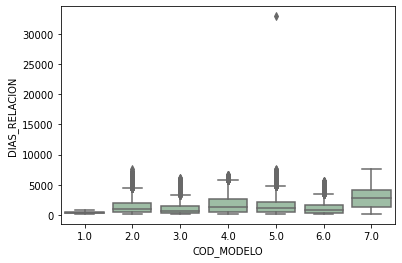

In [28]:
ax = sns.boxplot(x='COD_MODELO', y='DIAS_RELACION', data=df, color='#99c2a2')
plt.show()

In [29]:
#vemos en el gráfico superior que hay outlirers que nos distorsiona los gráficos
df['DIAS_RELACION'].describe()

count    142487.000000
mean       2323.776808
std        2122.986900
min         183.000000
25%         587.000000
50%        1570.000000
75%        3626.000000
max       32891.000000
Name: DIAS_RELACION, dtype: float64

In [30]:
outliers = df[df['DIAS_RELACION'] > df['DIAS_RELACION'].mean() + 4 * df['DIAS_RELACION'].std()]
pd.reset_option('max_rows')
outliers

,COD_VEHICULO_CLIMAPRO,FLAG_FINANCIADO,COD_MODELO,FLAG_MODELO_1,FLAG_MODELO_2,FLAG_MODELO_3,FLAG_MODELO_4,FLAG_MODELO_5,FLAG_MODELO_6,FLAG_MODELO_7,FLAG_MODELO_8,FLAG_DIESEL,FLAG_GASOLINA,FLAG_GASOLINA_GAS,PESO_VEHICULO_SLI,FECHA_MATRICULACION,NUM_OPCIONALES_SLI,COD_PERSONA_CLIMAPRO_I,FECHA_BAJA_CONS,FLAG_RELACION_ACTIVA,FECHA_ALTA_CONS,FLAG_ES_VO,FLAG_UNIVERSO_CONTACTABLE,COD_FINANCIACION,FLAG_CLIENTE_AUTONOMO,FLAG_CLIENTE_LABORAL,FLAG_CLIENTE_PARTICULAR,FLAG_CLIENTE_OTROS,FLAG_ANDALUCIA,FLAG_ARAGON,FLAG_ASTURIAS,FLAG_ILLES_BALEARS,FLAG_CANARIAS,FLAG_CANTABRIA,FLAG_CASTILLA_LEON,FLAG_CASTILLA_LAMANCHA,FLAG_CATALUNYA,FLAG_VALENCIA,FLAG_EXTREMADURA,FLAG_GALICIA,FLAG_MADRID,FLAG_MURCIA,FLAG_NAVARRA,FLAG_PAIS_VASCO,FLAG_LA_RIOJA,FLAG_CEUTA_MELILLA,FLAG_HOMBRE,FLAG_MUJER,FLAG_EMPRESA,FLAG_PERSONA_FISICA,EDAD,FLAG_AFECTADO_EMI,FLAG_LIFE,POTENCIA_CV,FLAG_3500KG,KM_ESTIMADO,FLAG_CLIENTE_REGISTRADO,FLAG_AUTONOMO,FLAG_MULTIVEHICULO,FLAG_CLIENTE_INSATISFECHO,FLAG_FLOTA,FLAG_VENTA_VN_COLECTIVO,FLAG_VENTA_VN_EMPLEADO,FLAG_VENTA_VN_FLOTA,FLAG_VENTA_VN_NA,FLAG_VENTA_VN_OTROS,FLAG_VENTA_VN_PERSONA,FLAG_VENTA_VN_RENTING,FLAG_VENTA_VN_TAXI,FLAG_VENTA_VN_VO,FLAG_PEDIDO_VN,PROSPECTS_2018,LEADS_2018,PROSPECTS_2019,LEADS_2019,PROSPECTS_2020,LEADS_2020,PROSPECTS_2021,LEADS_2021,IMPORTE_TOTAL_ORS_2015,NUM_ORS_2015,IMPORTE_TOTAL_ORS_2016,NUM_ORS_2016,IMPORTE_TOTAL_ORS_2017,NUM_ORS_2017,IMPORTE_TOTAL_ORS_2018,NUM_ORS_2018,IMPORTE_TOTAL_ORS_2019,NUM_ORS_2019,IMPORTE_TOTAL_ORS_2020,NUM_ORS_2020,IMPORTE_TOTAL_ORS_2021,NUM_ORS_2021,ID_RELACION,DIAS_RELACION
140564,1975675,0.0,NaN,0,0,0,0,0,0,0,0,0,0,0,NaN,1996-04-02,11.0,319325,2020-02-05,0,1990-01-01,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,NaN,0,0,NaN,0.0,NaN,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,1975675-319325,10992.0
168491,1975029,0.0,NaN,0,0,0,0,0,0,0,0,0,0,0,NaN,1996-04-10,10.0,835287,2020-01-29,0,1990-01-01,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,NaN,0,0,NaN,0.0,NaN,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,1975029-835287,10985.0
20912,1974600,0.0,NaN,0,0,0,0,0,0,0,0,0,0,0,NaN,1996-04-11,3.0,942846,2019-09-04,0,1990-01-01,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,NaN,0,1,NaN,0.0,NaN,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,1974600-942846,10838.0
155537,1975541,0.0,NaN,0,0,0,0,0,0,0,0,0,0,0,NaN,1996-04-17,11.0,3165969,2021-07-06,0,1990-01-01,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,NaN,0,0,NaN,0.0,NaN,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,1975541-3165969,11509.0
420664,1879898,0.0,NaN,0,0,0,0,0,0,0,0,0,0,0,NaN,1996-04-23,7.0,292370,2021-11-15,0,1990-01-01,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,54.0,1,0,NaN,0.0,NaN,0,0,1.0,0,0.0,0,0,0,0,1,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,548.15,1.0,246.83,2.0,377.09,3.0,414.62,2.0,45.37,1.0,245.42,1.0,337.23,2.0,1879898-292370,11641.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548164,1777949,0.0,NaN,0,0,0,0,0,0,0,0,0,0,0,NaN,1997-09-25,4.0,1831,2021-11-02,0,1990-01-01,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,NaN,0,0,NaN,1.0,NaN,0,0,1.0,0,0.0,0,0,0,1,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,1777949-1831,11628.0
258043,1856908,0.0,NaN,0,0,0,0,0,0,0,0,0,0,0,NaN,1997-09-30,7.0,2776945,2021-11-07,0,1990-01-01,0

### Dataset definitivo

In [31]:
#vemos que hay 200 relaciones que tienen fecha de inicio = 1990-01-01
#Filtraremos estas relaciones para evitar este tipo de outliers que probablemente se deban errores de inserción manual del dato
#También vemos una relación con fecha de baja 2109
df = df.loc[(df['FECHA_ALTA_CONS'] != '1990-01-01')]
df = df[pd.isnull(df['FECHA_BAJA_CONS']) | (df['FECHA_BAJA_CONS'] < today)]
df

,COD_VEHICULO_CLIMAPRO,FLAG_FINANCIADO,COD_MODELO,FLAG_MODELO_1,FLAG_MODELO_2,FLAG_MODELO_3,FLAG_MODELO_4,FLAG_MODELO_5,FLAG_MODELO_6,FLAG_MODELO_7,FLAG_MODELO_8,FLAG_DIESEL,FLAG_GASOLINA,FLAG_GASOLINA_GAS,PESO_VEHICULO_SLI,FECHA_MATRICULACION,NUM_OPCIONALES_SLI,COD_PERSONA_CLIMAPRO_I,FECHA_BAJA_CONS,FLAG_RELACION_ACTIVA,FECHA_ALTA_CONS,FLAG_ES_VO,FLAG_UNIVERSO_CONTACTABLE,COD_FINANCIACION,FLAG_CLIENTE_AUTONOMO,FLAG_CLIENTE_LABORAL,FLAG_CLIENTE_PARTICULAR,FLAG_CLIENTE_OTROS,FLAG_ANDALUCIA,FLAG_ARAGON,FLAG_ASTURIAS,FLAG_ILLES_BALEARS,FLAG_CANARIAS,FLAG_CANTABRIA,FLAG_CASTILLA_LEON,FLAG_CASTILLA_LAMANCHA,FLAG_CATALUNYA,FLAG_VALENCIA,FLAG_EXTREMADURA,FLAG_GALICIA,FLAG_MADRID,FLAG_MURCIA,FLAG_NAVARRA,FLAG_PAIS_VASCO,FLAG_LA_RIOJA,FLAG_CEUTA_MELILLA,FLAG_HOMBRE,FLAG_MUJER,FLAG_EMPRESA,FLAG_PERSONA_FISICA,EDAD,FLAG_AFECTADO_EMI,FLAG_LIFE,POTENCIA_CV,FLAG_3500KG,KM_ESTIMADO,FLAG_CLIENTE_REGISTRADO,FLAG_AUTONOMO,FLAG_MULTIVEHICULO,FLAG_CLIENTE_INSATISFECHO,FLAG_FLOTA,FLAG_VENTA_VN_COLECTIVO,FLAG_VENTA_VN_EMPLEADO,FLAG_VENTA_VN_FLOTA,FLAG_VENTA_VN_NA,FLAG_VENTA_VN_OTROS,FLAG_VENTA_VN_PERSONA,FLAG_VENTA_VN_RENTING,FLAG_VENTA_VN_TAXI,FLAG_VENTA_VN_VO,FLAG_PEDIDO_VN,PROSPECTS_2018,LEADS_2018,PROSPECTS_2019,LEADS_2019,PROSPECTS_2020,LEADS_2020,PROSPECTS_2021,LEADS_2021,IMPORTE_TOTAL_ORS_2015,NUM_ORS_2015,IMPORTE_TOTAL_ORS_2016,NUM_ORS_2016,IMPORTE_TOTAL_ORS_2017,NUM_ORS_2017,IMPORTE_TOTAL_ORS_2018,NUM_ORS_2018,IMPORTE_TOTAL_ORS_2019,NUM_ORS_2019,IMPORTE_TOTAL_ORS_2020,NUM_ORS_2020,IMPORTE_TOTAL_ORS_2021,NUM_ORS_2021,ID_RELACION,DIAS_RELACION
221188,1962015,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,NaN,1991-10-18,NaN,2449454,2018-10-09,0,2012-11-27,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,NaN,0,0,NaN,NaN,306597.29,0,0,0.0,0,NaN,0,0,0,1,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,428.66,3.0,0.00,0.0,376.06,1.0,134.71,1.0,0.00,0.0,0.00,0.0,0.00,0.0,1962015-2449454,2142.0
278618,1962730,0.0,NaN,0,0,0,0,0,0,0,0,0,0,0,NaN,1992-02-20,2.0,2997191,2011-09-19,0,2002-05-28,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,NaN,0,0,NaN,0.0,180986.30,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,1962730-2997191,3401.0
57755,1964287,0.0,NaN,0,0,0,0,0,0,0,0,0,0,0,NaN,1992-06-25,1.0,2594653,2017-03-08,0,2013-02-19,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,NaN,0,1,NaN,0.0,340716.04,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,1964287-2594653,1478.0
30247,1965116,0.0,NaN,0,0,0,0,0,0,0,0,0,0,0,NaN,1992-07-23,3.0,121231,2021-08-02,0,2006-08-21,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,NaN,0,1,NaN,0.0,NaN,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,1965116-121231,5460.0
260912,1965045,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,NaN,1992-08-03,NaN,2372461,NaT,1,2016-07-28,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,46.0,1,0,NaN,NaN,285985.00,0,0,0.0,0,NaN,0,0,0,1,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,811.10,1.0,51.24,1.0,101.86,2.0,106.83,3.0,97.62,2.0,97.62,2.0,97.62,3.0,1965045-2372461,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378473,6350205,1.0,6.0,0,0,0,0,0,1,0,0,1,0,0,2241.0,2022-01-31,16.0,3915948,NaT,1,2021-12-16,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,44.0,0,0,122.0,1.0,4968.36,0,0,1.0,0,0.0,0,0,0,0,1,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,6350205-3915948,NaN
165931,6375342,0.0,3.0,0,0,1,0,0,0,0,0,1,0,0,2404.0,2022-01-31,27.0,6262116,N

# Creamos nuevo sub conjunto de datos para estudiar únicamente registros de 2018

In [32]:
pd.reset_option('max_rows')

#Para empezar analizaremos los registros de 2018, mirando cuales se han dado de baja en 2019.
#Creamos un sub dataset con aquellas relaciones que terminan en 2019 y estaban activas en 2018
df_Bajas_2019 = df.loc[(df['FECHA_ALTA_CONS'] < '2019-01-01') & (df['FECHA_BAJA_CONS'] >= '2019-01-01') & (df['FECHA_BAJA_CONS'] < '2020-01-01')]
#Hacemos UNION de los dos casos de activos en 2018: 
#(1) gente que se dio de alta antes de 2019 y se dio de baja despues de 2019
#(2) gente que se dio de alta antes de 2019 y nunca se ha dado de baja
df_activos_2018_1 = df.loc[(df['FECHA_ALTA_CONS'] < '2019-01-01') & (df['FECHA_BAJA_CONS'] > '2019-01-01')]
df_activos_2018_2 = df.loc[(df['FECHA_ALTA_CONS'] < '2019-01-01') & (df['FLAG_RELACION_ACTIVA'] == 1)]
df_activos_2018 = pd.concat([df_activos_2018_1, df_activos_2018_2]) 
#Juntamos el dataset 2018 con los que se dan de baja en 2019
df_2018 = pd.merge(df_activos_2018,df_Bajas_2019[['ID_RELACION','FLAG_RELACION_ACTIVA']],on='ID_RELACION', how='left')
#Creamos el flag para marcar aquellos que terminan su relación en 2019
df_2018['FLAG_TERMINA_RELACION_2019'] = df_2018['FLAG_RELACION_ACTIVA_y']
df_2018.replace({'FLAG_TERMINA_RELACION_2019': {0.0: 1}}, inplace=True)
df_2018['FLAG_TERMINA_RELACION_2019'].fillna(0 , inplace = True)
df_2018.drop('FLAG_RELACION_ACTIVA_y', inplace=True, axis=1)
#Volvemos a darle al Flag_relacion_activa su nombre original
df_2018['FLAG_RELACION_ACTIVA'] = df_2018['FLAG_RELACION_ACTIVA_x']
df_2018.drop('FLAG_RELACION_ACTIVA_x', inplace=True, axis=1)
#Arreglamos DIAS_RELACION, solo está informada para aquellos registros que terminan la relacion
#vamos a indicar para todos los registros que DIAS_RELACION sea el número de días de relación a 01/01/2019
df_2018['FECHA_INICIO_2019'] = pd.to_datetime('2019-01-01', format="%Y-%m-%d").date()
df_2018['DIAS_RELACION_2018'] = (pd.to_datetime(df_2018["FECHA_INICIO_2019"]) - pd.to_datetime(df_2018["FECHA_ALTA_CONS"])).dt.days
df_2018.drop('DIAS_RELACION', inplace=True, axis=1)
df_2018.drop('FECHA_INICIO_2019', inplace=True, axis=1)
#df_2018.drop('FLAG_RELACION_ACTIVA', inplace=True, axis=1)
df_2018.drop('ID_RELACION', inplace=True, axis=1)
#df_2018.drop('FLAG_MODELO_4', inplace=True, axis=1)
df_2018

,COD_VEHICULO_CLIMAPRO,FLAG_FINANCIADO,COD_MODELO,FLAG_MODELO_1,FLAG_MODELO_2,FLAG_MODELO_3,FLAG_MODELO_4,FLAG_MODELO_5,FLAG_MODELO_6,FLAG_MODELO_7,FLAG_MODELO_8,FLAG_DIESEL,FLAG_GASOLINA,FLAG_GASOLINA_GAS,PESO_VEHICULO_SLI,FECHA_MATRICULACION,NUM_OPCIONALES_SLI,COD_PERSONA_CLIMAPRO_I,FECHA_BAJA_CONS,FECHA_ALTA_CONS,FLAG_ES_VO,FLAG_UNIVERSO_CONTACTABLE,COD_FINANCIACION,FLAG_CLIENTE_AUTONOMO,FLAG_CLIENTE_LABORAL,FLAG_CLIENTE_PARTICULAR,FLAG_CLIENTE_OTROS,FLAG_ANDALUCIA,FLAG_ARAGON,FLAG_ASTURIAS,FLAG_ILLES_BALEARS,FLAG_CANARIAS,FLAG_CANTABRIA,FLAG_CASTILLA_LEON,FLAG_CASTILLA_LAMANCHA,FLAG_CATALUNYA,FLAG_VALENCIA,FLAG_EXTREMADURA,FLAG_GALICIA,FLAG_MADRID,FLAG_MURCIA,FLAG_NAVARRA,FLAG_PAIS_VASCO,FLAG_LA_RIOJA,FLAG_CEUTA_MELILLA,FLAG_HOMBRE,FLAG_MUJER,FLAG_EMPRESA,FLAG_PERSONA_FISICA,EDAD,FLAG_AFECTADO_EMI,FLAG_LIFE,POTENCIA_CV,FLAG_3500KG,KM_ESTIMADO,FLAG_CLIENTE_REGISTRADO,FLAG_AUTONOMO,FLAG_MULTIVEHICULO,FLAG_CLIENTE_INSATISFECHO,FLAG_FLOTA,FLAG_VENTA_VN_COLECTIVO,FLAG_VENTA_VN_EMPLEADO,FLAG_VENTA_VN_FLOTA,FLAG_VENTA_VN_NA,FLAG_VENTA_VN_OTROS,FLAG_VENTA_VN_PERSONA,FLAG_VENTA_VN_RENTING,FLAG_VENTA_VN_TAXI,FLAG_VENTA_VN_VO,FLAG_PEDIDO_VN,PROSPECTS_2018,LEADS_2018,PROSPECTS_2019,LEADS_2019,PROSPECTS_2020,LEADS_2020,PROSPECTS_2021,LEADS_2021,IMPORTE_TOTAL_ORS_2015,NUM_ORS_2015,IMPORTE_TOTAL_ORS_2016,NUM_ORS_2016,IMPORTE_TOTAL_ORS_2017,NUM_ORS_2017,IMPORTE_TOTAL_ORS_2018,NUM_ORS_2018,IMPORTE_TOTAL_ORS_2019,NUM_ORS_2019,IMPORTE_TOTAL_ORS_2020,NUM_ORS_2020,IMPORTE_TOTAL_ORS_2021,NUM_ORS_2021,FLAG_TERMINA_RELACION_2019,FLAG_RELACION_ACTIVA,DIAS_RELACION_2018
0,1965116,0.0,NaN,0,0,0,0,0,0,0,0,0,0,0,NaN,1992-07-23,3.0,121231,2021-08-02,2006-08-21,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,NaN,0,1,NaN,0.0,NaN,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0,4516
1,1970628,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,NaN,1994-07-25,NaN,889023,2019-07-08,2008-07-18,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,43.0,0,0,NaN,NaN,289029.45,1,0,0.0,0,NaN,0,0,0,1,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,153.45,1.0,672.25,2.0,1857.24,3.0,1071.87,3.0,0.00,0.0,0.00,0.0,0.0,0.0,1.0,0,3819
2,1975874,0.0,NaN,0,0,0,0,0,0,0,0,0,0,0,NaN,1996-04-10,13.0,1374808,2020-08-19,2016-04-25,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,NaN,0,0,NaN,0.0,302169.10,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,1554.36,2.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0,981
3,1879202,0.0,NaN,0,0,0,0,0,0,0,0,0,0,0,NaN,1996-04-15,1.0,148189,2019-12-22,2009-01-27,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,NaN,0,0,NaN,0.0,NaN,0,0,0.0,0,0.0,0,0,0,0,1,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,1.0,0,3626
4,1879093,0.0,NaN,0,0,0,0,0,0,0,0,0,0,0,NaN,1996-04-16,1.0,211070,2019-07-29,2004-11-17,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,NaN,1,0,NaN,0.0,NaN,0,0,0.0,0,0.0,0,0,0,0,1,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,127.34,2.0,27.95,1.0,27.95,1.0,247.62,2.0,79.75,2.0,0.00,0.0,0.0,0.0,1.0,0,5158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114257,4429053,0.0,5.0,0,0,0,0,1,0,0,0,1,0,0,1472.0,2020-06-26,14.0,9165032,NaT,2018-02-26,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,41.0,1,0,75.0,0.0,23842.57,0,0,1.0,0,1.0,0,0,0,0,0,0,1,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,1,309
114258,4429059,0.0,5.0,0,0,0,0,1,0,0,0,1,0,0,1472.0,2020-06-26,14.0,9165032,NaT,2018-02-26,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,41.0,1,0,75.0,0.0,2


# Analizamos % de 1s vs 0s

In [33]:
#Sacamos los valores que tienen las columnas binarias
binary_df=df_2018[df.loc[:,(df.eq(0)|df.eq(1)).all()].columns].apply(pd.Series.value_counts)
#Trasponemos columnas
binary_dft=binary_df.T
#Renombramos nombre de columnas
binary_dft.rename({0: 'zero', 1: 'one'}, axis='columns', inplace=True)
#Calculamos número de 1s vs 0s de columnas
binary_dft['%ones'] = (binary_dft['one']/(binary_dft['zero']+binary_dft['one']))*100
binary_dft.sort_values(by=['%ones'], inplace=True, ascending=True)
binary_dft

,zero,one,%ones
FLAG_VENTA_VN_PERSONA,114244.0,18.0,0.015753
FLAG_VENTA_VN_VO,114234.0,28.0,0.024505
FLAG_CEUTA_MELILLA,114222.0,40.0,0.035007
FLAG_CANARIAS,114206.0,56.0,0.049010
FLAG_AUTONOMO,114133.0,129.0,0.112898
FLAG_VENTA_VN_EMPLEADO,113872.0,390.0,0.341321
FLAG_CLIENTE_REGISTRADO,113805.0,457.0,0.399958
FLAG_UNIVERSO_CONTACTABLE,113783.0,479.0,0.419212
FLAG_GASOLINA_GAS,113653.0,609.0,0.532986
FLAG_GASOLINA,113504.0,758.0,0.663388


In [34]:
#Elegimos unicamente las que tengan más de un 15% de 1s
binary_dft = binary_dft.loc[(binary_dft['%ones'] > 15)]
binary_dft = binary_dft.loc[(binary_dft['%ones'] < 85)]
varibales_df = binary_dft.index.values.tolist()
#varibales_df.remove('FLAG_PEDIDO_VN')
varibales_df.remove('FLAG_PERSONA_FISICA')
varibales_df.remove('FLAG_RELACION_ACTIVA')
varibales_df.remove('FLAG_MODELO_5')
binary_dft
#Solo nos quedan comunidad autonoma de  catalunya, madrid y andalucia
#Y los modelos 4 y 5

,zero,one,%ones
FLAG_ANDALUCIA,95517.0,18745.0,16.405279
FLAG_LIFE,95421.0,18841.0,16.489297
FLAG_CATALUNYA,94484.0,19778.0,17.309342
FLAG_MADRID,93380.0,20882.0,18.275542
FLAG_MODELO_4,90727.0,23535.0,20.597399
FLAG_VENTA_VN_FLOTA,89830.0,24432.0,21.382437
FLAG_AFECTADO_EMI,84059.0,30203.0,26.433110
FLAG_CLIENTE_LABORAL,81270.0,32992.0,28.873991
FLAG_MODELO_5,74252.0,40010.0,35.016016
FLAG_HOMBRE,67214.0,47048.0,41.175544


In [35]:
df_2018

,COD_VEHICULO_CLIMAPRO,FLAG_FINANCIADO,COD_MODELO,FLAG_MODELO_1,FLAG_MODELO_2,FLAG_MODELO_3,FLAG_MODELO_4,FLAG_MODELO_5,FLAG_MODELO_6,FLAG_MODELO_7,FLAG_MODELO_8,FLAG_DIESEL,FLAG_GASOLINA,FLAG_GASOLINA_GAS,PESO_VEHICULO_SLI,FECHA_MATRICULACION,NUM_OPCIONALES_SLI,COD_PERSONA_CLIMAPRO_I,FECHA_BAJA_CONS,FECHA_ALTA_CONS,FLAG_ES_VO,FLAG_UNIVERSO_CONTACTABLE,COD_FINANCIACION,FLAG_CLIENTE_AUTONOMO,FLAG_CLIENTE_LABORAL,FLAG_CLIENTE_PARTICULAR,FLAG_CLIENTE_OTROS,FLAG_ANDALUCIA,FLAG_ARAGON,FLAG_ASTURIAS,FLAG_ILLES_BALEARS,FLAG_CANARIAS,FLAG_CANTABRIA,FLAG_CASTILLA_LEON,FLAG_CASTILLA_LAMANCHA,FLAG_CATALUNYA,FLAG_VALENCIA,FLAG_EXTREMADURA,FLAG_GALICIA,FLAG_MADRID,FLAG_MURCIA,FLAG_NAVARRA,FLAG_PAIS_VASCO,FLAG_LA_RIOJA,FLAG_CEUTA_MELILLA,FLAG_HOMBRE,FLAG_MUJER,FLAG_EMPRESA,FLAG_PERSONA_FISICA,EDAD,FLAG_AFECTADO_EMI,FLAG_LIFE,POTENCIA_CV,FLAG_3500KG,KM_ESTIMADO,FLAG_CLIENTE_REGISTRADO,FLAG_AUTONOMO,FLAG_MULTIVEHICULO,FLAG_CLIENTE_INSATISFECHO,FLAG_FLOTA,FLAG_VENTA_VN_COLECTIVO,FLAG_VENTA_VN_EMPLEADO,FLAG_VENTA_VN_FLOTA,FLAG_VENTA_VN_NA,FLAG_VENTA_VN_OTROS,FLAG_VENTA_VN_PERSONA,FLAG_VENTA_VN_RENTING,FLAG_VENTA_VN_TAXI,FLAG_VENTA_VN_VO,FLAG_PEDIDO_VN,PROSPECTS_2018,LEADS_2018,PROSPECTS_2019,LEADS_2019,PROSPECTS_2020,LEADS_2020,PROSPECTS_2021,LEADS_2021,IMPORTE_TOTAL_ORS_2015,NUM_ORS_2015,IMPORTE_TOTAL_ORS_2016,NUM_ORS_2016,IMPORTE_TOTAL_ORS_2017,NUM_ORS_2017,IMPORTE_TOTAL_ORS_2018,NUM_ORS_2018,IMPORTE_TOTAL_ORS_2019,NUM_ORS_2019,IMPORTE_TOTAL_ORS_2020,NUM_ORS_2020,IMPORTE_TOTAL_ORS_2021,NUM_ORS_2021,FLAG_TERMINA_RELACION_2019,FLAG_RELACION_ACTIVA,DIAS_RELACION_2018
0,1965116,0.0,NaN,0,0,0,0,0,0,0,0,0,0,0,NaN,1992-07-23,3.0,121231,2021-08-02,2006-08-21,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,NaN,0,1,NaN,0.0,NaN,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0,4516
1,1970628,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,NaN,1994-07-25,NaN,889023,2019-07-08,2008-07-18,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,43.0,0,0,NaN,NaN,289029.45,1,0,0.0,0,NaN,0,0,0,1,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,153.45,1.0,672.25,2.0,1857.24,3.0,1071.87,3.0,0.00,0.0,0.00,0.0,0.0,0.0,1.0,0,3819
2,1975874,0.0,NaN,0,0,0,0,0,0,0,0,0,0,0,NaN,1996-04-10,13.0,1374808,2020-08-19,2016-04-25,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,NaN,0,0,NaN,0.0,302169.10,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,1554.36,2.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0,981
3,1879202,0.0,NaN,0,0,0,0,0,0,0,0,0,0,0,NaN,1996-04-15,1.0,148189,2019-12-22,2009-01-27,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,NaN,0,0,NaN,0.0,NaN,0,0,0.0,0,0.0,0,0,0,0,1,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,1.0,0,3626
4,1879093,0.0,NaN,0,0,0,0,0,0,0,0,0,0,0,NaN,1996-04-16,1.0,211070,2019-07-29,2004-11-17,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,NaN,1,0,NaN,0.0,NaN,0,0,0.0,0,0.0,0,0,0,0,1,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,127.34,2.0,27.95,1.0,27.95,1.0,247.62,2.0,79.75,2.0,0.00,0.0,0.0,0.0,1.0,0,5158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114257,4429053,0.0,5.0,0,0,0,0,1,0,0,0,1,0,0,1472.0,2020-06-26,14.0,9165032,NaT,2018-02-26,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,41.0,1,0,75.0,0.0,23842.57,0,0,1.0,0,1.0,0,0,0,0,0,0,1,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,1,309
114258,4429059,0.0,5.0,0,0,0,0,1,0,0,0,1,0,0,1472.0,2020-06-26,14.0,9165032,NaT,2018-02-26,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,41.0,1,0,75.0,0.0,2

In [36]:
#Eliminamos filas de registros que no estudiaremos como por ejemplo cliente de La Rioja

df_2018 = df_2018[df_2018.FLAG_CEUTA_MELILLA != 1]
df_2018 = df_2018[df_2018.FLAG_CANARIAS != 1]
df_2018 = df_2018[df_2018.FLAG_LA_RIOJA != 1]
df_2018 = df_2018[df_2018.FLAG_CANTABRIA != 1]
df_2018 = df_2018[df_2018.FLAG_ASTURIAS != 1]
df_2018 = df_2018[df_2018.FLAG_ILLES_BALEARS != 1]
df_2018 = df_2018[df_2018.FLAG_CASTILLA_LAMANCHA != 1]
df_2018 = df_2018[df_2018.FLAG_NAVARRA != 1]
df_2018 = df_2018[df_2018.FLAG_ARAGON != 1]
df_2018 = df_2018[df_2018.FLAG_MURCIA != 1]
df_2018 = df_2018[df_2018.FLAG_EXTREMADURA != 1]
df_2018 = df_2018[df_2018.FLAG_GALICIA != 1]
df_2018 = df_2018[df_2018.FLAG_CASTILLA_LEON != 1]
df_2018 = df_2018[df_2018.FLAG_PAIS_VASCO != 1]
df_2018 = df_2018[df_2018.FLAG_VALENCIA != 1]
df_2018 = df_2018[df_2018.FLAG_MODELO_7 != 1]
df_2018 = df_2018[df_2018.FLAG_MODELO_3 != 1]
df_2018 = df_2018[df_2018.FLAG_MODELO_2 != 1]
df_2018 = df_2018[df_2018.COD_MODELO != 6]

In [37]:
#Añadimos variables no binarias
varibales_df.append('DIAS_RELACION_2018')
varibales_df.append('PESO_VEHICULO_SLI')
varibales_df.append('NUM_OPCIONALES_SLI')
varibales_df.append('COD_FINANCIACION')
varibales_df.append('EDAD')
varibales_df.append('POTENCIA_CV')
varibales_df.append('PROSPECTS_2018')
varibales_df.append('LEADS_2018')
varibales_df.append('PROSPECTS_2019')
varibales_df.append('LEADS_2019')
varibales_df.append('IMPORTE_TOTAL_ORS_2018')
varibales_df.append('NUM_ORS_2018')
varibales_df.append('FLAG_TERMINA_RELACION_2019')
#varibales_df.append('FLAG_RELACION_ACTIVA')
df_2018= df_2018[varibales_df]
df_2018

,FLAG_ANDALUCIA,FLAG_LIFE,FLAG_CATALUNYA,FLAG_MADRID,FLAG_MODELO_4,FLAG_VENTA_VN_FLOTA,FLAG_AFECTADO_EMI,FLAG_CLIENTE_LABORAL,FLAG_HOMBRE,FLAG_CLIENTE_PARTICULAR,FLAG_EMPRESA,FLAG_DIESEL,DIAS_RELACION_2018,PESO_VEHICULO_SLI,NUM_OPCIONALES_SLI,COD_FINANCIACION,EDAD,POTENCIA_CV,PROSPECTS_2018,LEADS_2018,PROSPECTS_2019,LEADS_2019,IMPORTE_TOTAL_ORS_2018,NUM_ORS_2018,FLAG_TERMINA_RELACION_2019
0,0,1,1,0,0,0,0,0,0,0,1,0,4516,NaN,3.0,0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,1,1,0,0,981,NaN,13.0,0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0,0,1,0,0,0,0,0,1,1,0,0,1975,NaN,9.0,0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,0,0,1,0,0,0,0,0,1,1,0,0,1210,NaN,5.0,0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,1,0,0,0,0,0,0,0,1,1,0,0,1924,NaN,13.0,0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114257,0,0,0,1,0,0,1,0,0,1,1,1,309,1472.0,14.0,0,41.0,75.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
114258,0,0,0,1,0,0,1,0,0,1,1,1,309,1472.0,14.0,0,41.0,75.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
114259,0,0,0,1,0,0,1,0,0,1,1,1,309,1472.0,14.0,0,41.0,75.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
114260,0,0,0,1,0,0,1,0,0,1,1,1,309,1472.0,14.0,0,41.0,75.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
def missing_values_table(df_2018):
    mis_val = df_2018.isnull().sum()
    mis_val_percent = 100 * df_2018.isnull().sum() / len(df_2018)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(df_2018.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
    return mis_val_table_ren_columns
missing_values_table(df_2018)

Your selected dataframe has 25 columns.
There are 4 columns that have missing values.


,Missing Values,% of Total Values
EDAD,32211,68.4
POTENCIA_CV,10894,23.1
PESO_VEHICULO_SLI,681,1.4
NUM_OPCIONALES_SLI,23,0.0


In [39]:
def rank_performance(x):
    if x <= 25:
        return 'Menos de 25 años'
    elif x <= 35:
        return '26 a 35 años'
    elif x <= 45:
        return '36 a 45 años'
    elif x <= 60:
        return '46 a 60 años'
    elif x > 60:
        return 'Más de 60'
    elif math.isnan(x):
        return 'Sin informar'
    else:
        return 'Mal informado'

<AxesSubplot:ylabel='EDAD'>

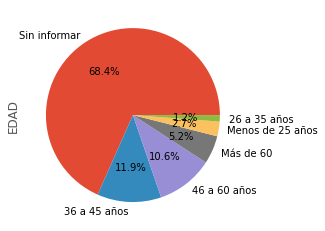

In [40]:
plt.style.use('ggplot')
df_2018['EDAD'].apply(rank_performance).value_counts().plot(kind = 'pie',
legend = False, include_bool =False, autopct='%1.1f%%')

<AxesSubplot:>

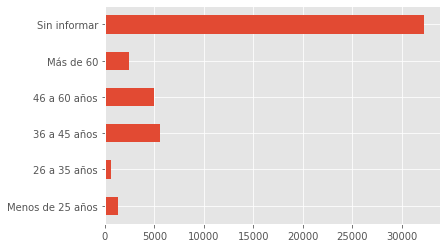

In [41]:
order = ['Menos de 25 años', '26 a 35 años', '36 a 45 años','46 a 60 años','Más de 60','Sin informar']
df_2018['EDAD'].apply(rank_performance).value_counts().loc[order].plot(kind = 'barh', legend = False)

### Analizamos número de 0s de las variables no binarias

In [42]:
#Analizamos número de 0s
print('columns')
pct_zeros=df_2018[df_2018 == 0].count(axis=0)/len(df_2018.index)
pct_zeros.sort_values(ascending=False)

columns


LEADS_2018                    1.000000
PROSPECTS_2018                1.000000
LEADS_2019                    0.997772
PROSPECTS_2019                0.997241
COD_FINANCIACION              0.985400
FLAG_LIFE                     0.922354
FLAG_TERMINA_RELACION_2019    0.898841
FLAG_VENTA_VN_FLOTA           0.810649
IMPORTE_TOTAL_ORS_2018        0.755984
NUM_ORS_2018                  0.752228
FLAG_CLIENTE_LABORAL          0.728143
FLAG_MODELO_4                 0.724832
FLAG_CATALUNYA                0.706455
FLAG_ANDALUCIA                0.697712
FLAG_AFECTADO_EMI             0.660873
FLAG_MADRID                   0.652704
FLAG_HOMBRE                   0.618560
FLAG_EMPRESA                  0.479819
FLAG_CLIENTE_PARTICULAR       0.477633
FLAG_DIESEL                   0.253204
NUM_OPCIONALES_SLI            0.003077
PESO_VEHICULO_SLI             0.000000
EDAD                          0.000000
POTENCIA_CV                   0.000000
DIAS_RELACION_2018            0.000000
dtype: float64

In [43]:
#Eliminamos los siguientes campos ya que están muy descompensados
df_2018.drop('LEADS_2018', inplace=True, axis=1)
df_2018.drop('PROSPECTS_2018', inplace=True, axis=1)
df_2018.drop('LEADS_2019', inplace=True, axis=1)
df_2018.drop('PROSPECTS_2019', inplace=True, axis=1)
df_2018.drop('COD_FINANCIACION', inplace=True, axis=1)
df_2018.drop('EDAD', inplace=True, axis=1)

In [44]:
df_2018

,FLAG_ANDALUCIA,FLAG_LIFE,FLAG_CATALUNYA,FLAG_MADRID,FLAG_MODELO_4,FLAG_VENTA_VN_FLOTA,FLAG_AFECTADO_EMI,FLAG_CLIENTE_LABORAL,FLAG_HOMBRE,FLAG_CLIENTE_PARTICULAR,FLAG_EMPRESA,FLAG_DIESEL,DIAS_RELACION_2018,PESO_VEHICULO_SLI,NUM_OPCIONALES_SLI,POTENCIA_CV,IMPORTE_TOTAL_ORS_2018,NUM_ORS_2018,FLAG_TERMINA_RELACION_2019
0,0,1,1,0,0,0,0,0,0,0,1,0,4516,NaN,3.0,NaN,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,1,1,0,0,981,NaN,13.0,NaN,0.0,0.0,0.0
5,0,0,1,0,0,0,0,0,1,1,0,0,1975,NaN,9.0,NaN,0.0,0.0,0.0
13,0,0,1,0,0,0,0,0,1,1,0,0,1210,NaN,5.0,NaN,0.0,0.0,0.0
17,1,0,0,0,0,0,0,0,1,1,0,0,1924,NaN,13.0,NaN,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114257,0,0,0,1,0,0,1,0,0,1,1,1,309,1472.0,14.0,75.0,0.0,0.0,0.0
114258,0,0,0,1,0,0,1,0,0,1,1,1,309,1472.0,14.0,75.0,0.0,0.0,0.0
114259,0,0,0,1,0,0,1,0,0,1,1,1,309,1472.0,14.0,75.0,0.0,0.0,0.0
114260,0,0,0,1,0,0,1,0,0,1,1,1,309,1472.0,14.0,75.0,0.0,0.0,0.0


In [45]:
df_2018['FLAG_TERMINA_RELACION_2019'].value_counts()

0.0    42357
1.0     4767
Name: FLAG_TERMINA_RELACION_2019, dtype: int64

In [46]:
def missing_values_table(df_2018):
    mis_val = df_2018.isnull().sum()
    mis_val_percent = 100 * df_2018.isnull().sum() / len(df_2018)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(df_2018.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
    return mis_val_table_ren_columns
missing_values_table(df_2018)

Your selected dataframe has 19 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
POTENCIA_CV,10894,23.1
PESO_VEHICULO_SLI,681,1.4
NUM_OPCIONALES_SLI,23,0.0


In [47]:
#Borramos filas con valores vacíos
df_2018 = df_2018.dropna()

In [48]:
def missing_values_table(df_2018):
    mis_val = df_2018.isnull().sum()
    mis_val_percent = 100 * df_2018.isnull().sum() / len(df_2018)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(df_2018.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
    return mis_val_table_ren_columns
missing_values_table(df_2018)

Your selected dataframe has 19 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


# Dataframe 2018 limpio

In [49]:
df_2018

,FLAG_ANDALUCIA,FLAG_LIFE,FLAG_CATALUNYA,FLAG_MADRID,FLAG_MODELO_4,FLAG_VENTA_VN_FLOTA,FLAG_AFECTADO_EMI,FLAG_CLIENTE_LABORAL,FLAG_HOMBRE,FLAG_CLIENTE_PARTICULAR,FLAG_EMPRESA,FLAG_DIESEL,DIAS_RELACION_2018,PESO_VEHICULO_SLI,NUM_OPCIONALES_SLI,POTENCIA_CV,IMPORTE_TOTAL_ORS_2018,NUM_ORS_2018,FLAG_TERMINA_RELACION_2019
1924,0,0,1,0,0,0,0,0,0,1,0,1,1663,1517.0,9.0,75.0,1121.08,3.0,1.0
2346,0,0,0,0,0,0,0,0,1,1,0,0,6698,1135.0,2.0,60.0,1121.88,1.0,1.0
2351,0,0,0,0,0,0,0,0,1,1,0,1,6612,1175.0,5.0,90.0,0.00,0.0,1.0
2480,0,0,0,1,0,0,0,0,0,0,1,1,6522,1109.0,2.0,64.0,0.00,0.0,1.0
2512,0,0,1,0,0,0,0,0,1,1,0,0,6500,1135.0,2.0,60.0,0.00,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114257,0,0,0,1,0,0,1,0,0,1,1,1,309,1472.0,14.0,75.0,0.00,0.0,0.0
114258,0,0,0,1,0,0,1,0,0,1,1,1,309,1472.0,14.0,75.0,0.00,0.0,0.0
114259,0,0,0,1,0,0,1,0,0,1,1,1,309,1472.0,14.0,75.0,0.00,0.0,0.0
114260,0,0,0,1,0,0,1,0,0,1,1,1,309,1472.0,14.0,75.0,0.00,0.0,0.0


In [50]:
df_2018.columns

Index(['FLAG_ANDALUCIA', 'FLAG_LIFE', 'FLAG_CATALUNYA', 'FLAG_MADRID',
       'FLAG_MODELO_4', 'FLAG_VENTA_VN_FLOTA', 'FLAG_AFECTADO_EMI',
       'FLAG_CLIENTE_LABORAL', 'FLAG_HOMBRE', 'FLAG_CLIENTE_PARTICULAR',
       'FLAG_EMPRESA', 'FLAG_DIESEL', 'DIAS_RELACION_2018',
       'PESO_VEHICULO_SLI', 'NUM_OPCIONALES_SLI', 'POTENCIA_CV',
       'IMPORTE_TOTAL_ORS_2018', 'NUM_ORS_2018', 'FLAG_TERMINA_RELACION_2019'],
      dtype='object')

In [51]:
df_2018['FLAG_TERMINA_RELACION_2019'].value_counts()

0.0    32098
1.0     4132
Name: FLAG_TERMINA_RELACION_2019, dtype: int64

<AxesSubplot:ylabel='DIAS_RELACION_2018'>

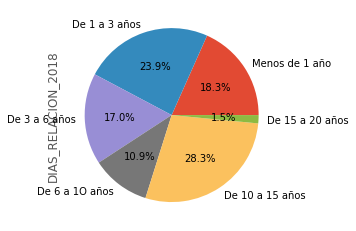

In [52]:
def rank_relacion(x):
    if x <= 365:
        return 'Menos de 1 año'
    elif x <= 365*3:
        return 'De 1 a 3 años'
    elif x <= 365*6:
        return 'De 3 a 6 años'
    elif x <= 365*10:
        return 'De 6 a 1O años'
    elif x <= 365*15:
        return 'De 10 a 15 años'
    elif x <= 365*20:
        return 'De 15 a 20 años'
    elif x <= 365*50:
        return 'De 20 a 50 años'
    elif math.isnan(x):
        return 'Sin informar'
    else:
        return 'Más de 50 años'
order = ['Menos de 1 año', 'De 1 a 3 años', 'De 3 a 6 años','De 6 a 1O años','De 10 a 15 años','De 15 a 20 años']
df_2018['DIAS_RELACION_2018'].apply(rank_relacion).value_counts().loc[order].plot(kind = 'pie', legend = False, include_bool =False, autopct='%1.1f%%')

<AxesSubplot:>

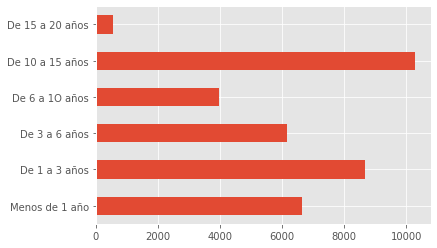

In [53]:
df_2018['DIAS_RELACION_2018'].apply(rank_relacion).value_counts().loc[order].plot(kind = 'barh', 
legend = False, include_bool =False)

### Una vez cerrado el DataFrame analizamos las correlaciones entre variables

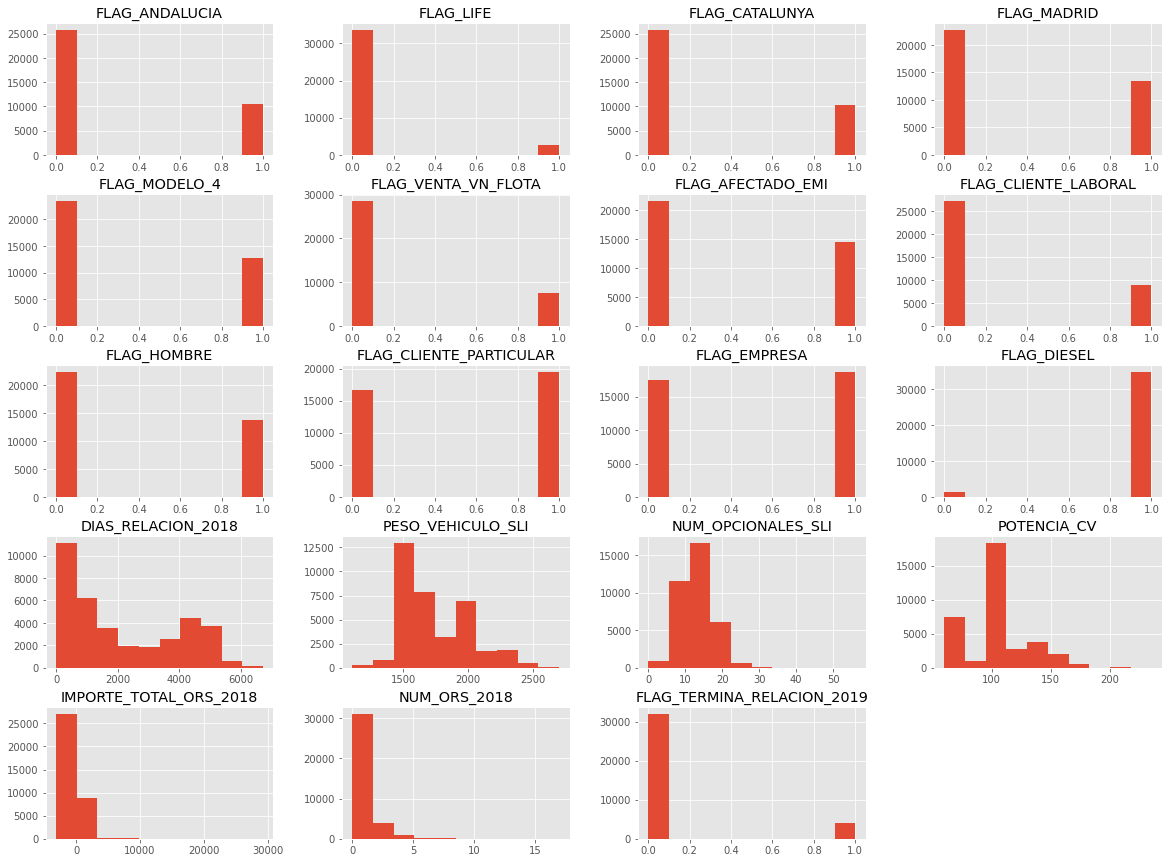

In [54]:
df_2018.hist(figsize=(20,15));

In [55]:
#La mayoría de las variables están bastante balanceadas excepto FLAG_LIFE, FLAG_DIESEL Y FLAG_TERMINA_RELACION_2019
#df_2018["FLAG_DIESEL"].value_counts()
#1289*100/(1289+34941) = 3,56%

## Mismo comportamiento de ORS para 2018 y 2019

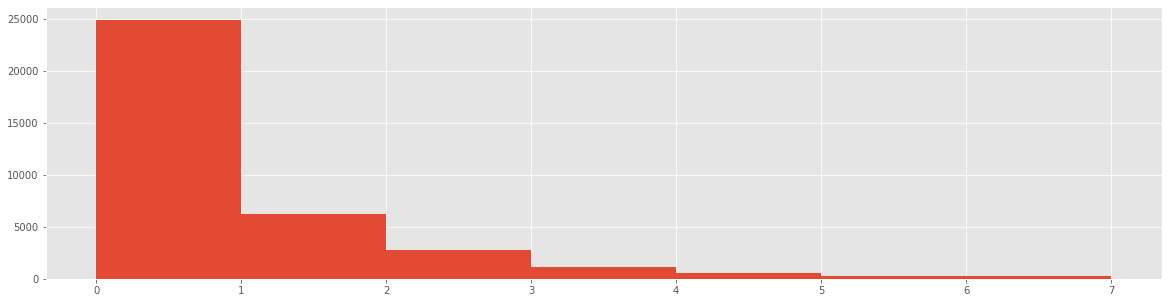

In [56]:
df_2018["NUM_ORS_2018"].hist(figsize=(20,5), bins=[0, 1, 2, 3, 4, 5, 6, 7]);

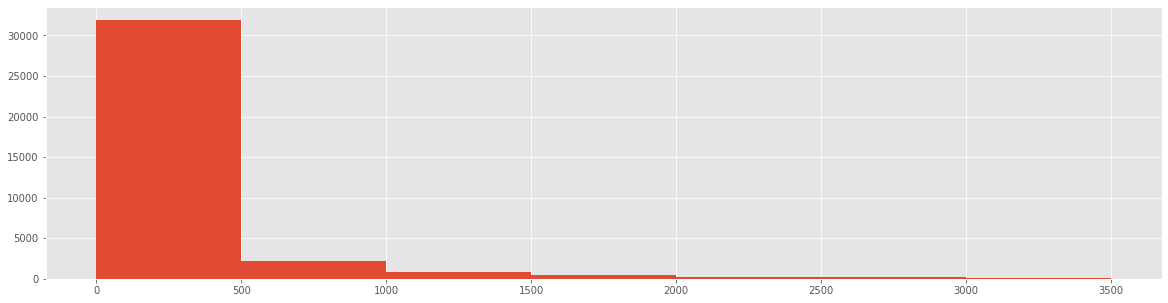

In [57]:
df_2018["IMPORTE_TOTAL_ORS_2018"].hist(figsize=(20,5), bins=[0, 500, 1000, 1500, 2000, 2500, 3000, 3500]);

In [58]:
# No es posible extraer conclusiones de los boxplot

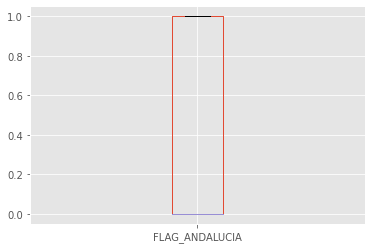

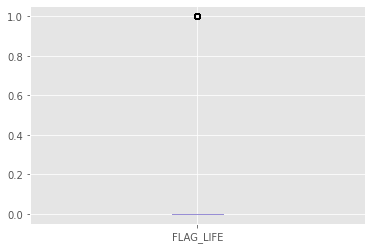

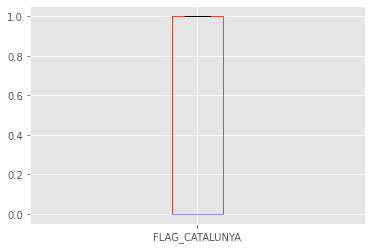

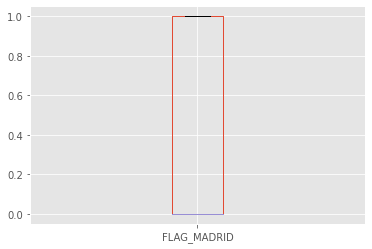

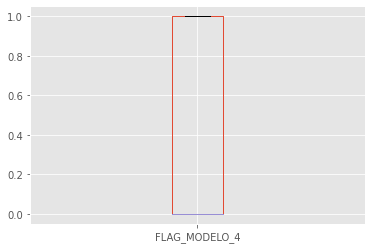

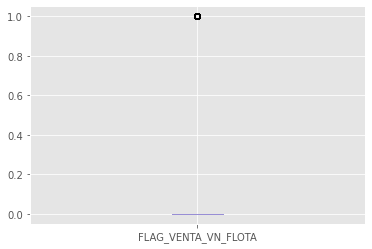

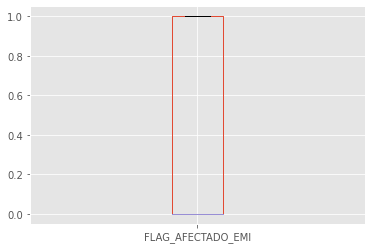

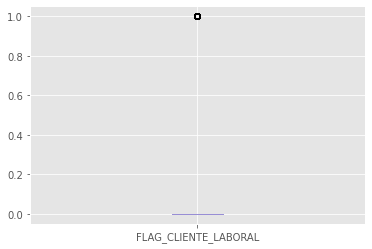

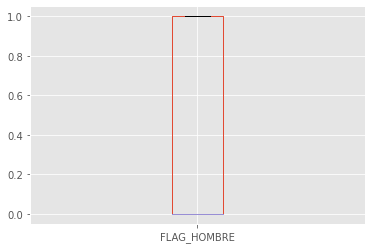

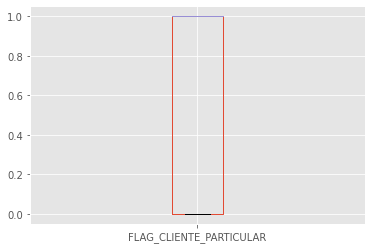

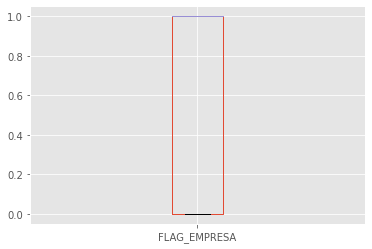

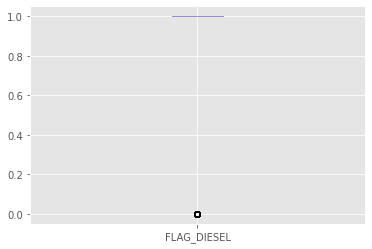

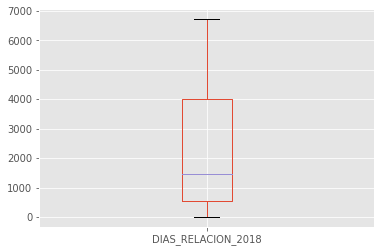

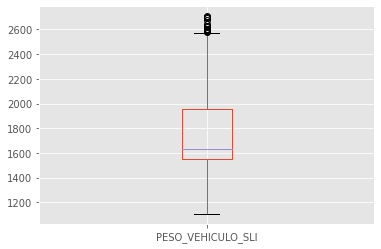

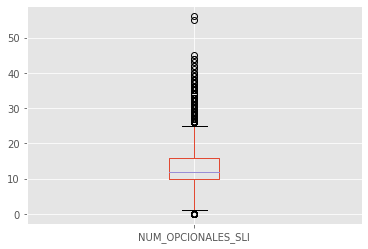

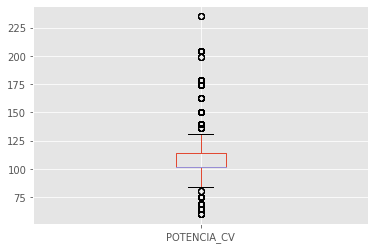

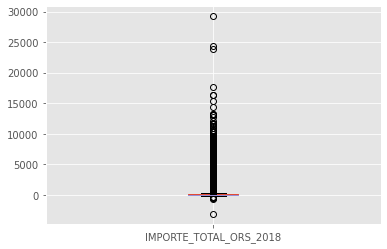

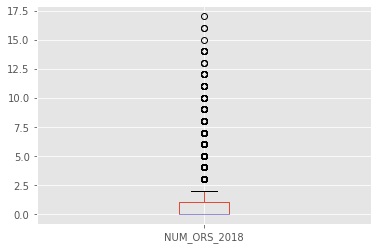

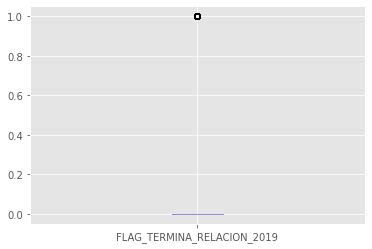

In [59]:
for column in df_2018:
    plt.figure()
    df_2018.boxplot([column])

## Correlaciones con variable a predecir 

In [60]:
#No vemos ninguna variable relacionada con nuestra variable a predecir (termina relacion_2019)
#Las dos que parecen tener más peso son el NUM_ORS_2019 y los días de relacion de 2018
pd.set_option('display.max_rows', None)
df_2018.corrwith(df_2018['FLAG_TERMINA_RELACION_2019']).sort_values()

DIAS_RELACION_2018           -0.098015
FLAG_HOMBRE                  -0.068684
FLAG_ANDALUCIA               -0.063188
FLAG_CLIENTE_LABORAL         -0.032565
FLAG_DIESEL                  -0.015934
FLAG_CATALUNYA               -0.011920
FLAG_CLIENTE_PARTICULAR      -0.004944
FLAG_MODELO_4                -0.000955
FLAG_VENTA_VN_FLOTA          -0.000853
POTENCIA_CV                   0.016959
PESO_VEHICULO_SLI             0.021044
FLAG_LIFE                     0.021318
NUM_OPCIONALES_SLI            0.028377
IMPORTE_TOTAL_ORS_2018        0.030184
NUM_ORS_2018                  0.043881
FLAG_MADRID                   0.074054
FLAG_AFECTADO_EMI             0.080502
FLAG_EMPRESA                  0.084292
FLAG_TERMINA_RELACION_2019    1.000000
dtype: float64

In [61]:
#Correlaciones dias_relacion_2018 con el resto de variables
pd.reset_option('max_rows')
df_2018.corrwith(df_2018['DIAS_RELACION_2018']).sort_values()

NUM_OPCIONALES_SLI           -0.412976
NUM_ORS_2018                 -0.324715
FLAG_AFECTADO_EMI            -0.313895
FLAG_MADRID                  -0.256391
FLAG_EMPRESA                 -0.167753
IMPORTE_TOTAL_ORS_2018       -0.161539
POTENCIA_CV                  -0.135982
PESO_VEHICULO_SLI            -0.100336
FLAG_TERMINA_RELACION_2019   -0.098015
FLAG_LIFE                    -0.064960
FLAG_VENTA_VN_FLOTA          -0.063201
FLAG_CLIENTE_PARTICULAR      -0.061849
FLAG_CATALUNYA                0.051975
FLAG_MODELO_4                 0.107926
FLAG_CLIENTE_LABORAL          0.130934
FLAG_DIESEL                   0.152257
FLAG_HOMBRE                   0.160685
FLAG_ANDALUCIA                0.205161
DIAS_RELACION_2018            1.000000
dtype: float64

In [62]:
df_2018.corrwith(df_2018['NUM_ORS_2018']).sort_values()

DIAS_RELACION_2018           -0.324715
FLAG_CLIENTE_PARTICULAR      -0.095712
FLAG_DIESEL                  -0.087806
FLAG_EMPRESA                 -0.059724
FLAG_ANDALUCIA               -0.038222
FLAG_MADRID                   0.000053
FLAG_MODELO_4                 0.003855
FLAG_AFECTADO_EMI             0.010297
FLAG_HOMBRE                   0.039162
FLAG_TERMINA_RELACION_2019    0.043881
FLAG_CLIENTE_LABORAL          0.047727
FLAG_CATALUNYA                0.048806
FLAG_VENTA_VN_FLOTA           0.058432
FLAG_LIFE                     0.082481
PESO_VEHICULO_SLI             0.118517
POTENCIA_CV                   0.139517
NUM_OPCIONALES_SLI            0.269048
IMPORTE_TOTAL_ORS_2018        0.589598
NUM_ORS_2018                  1.000000
dtype: float64

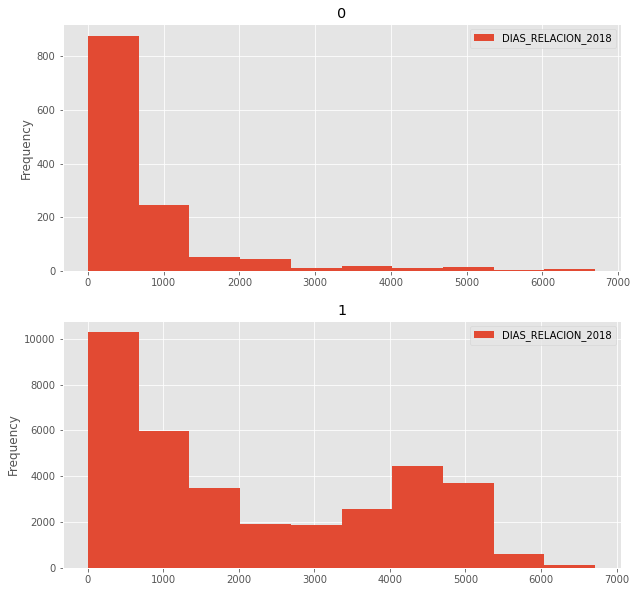

In [63]:
#Buscamos relacion entre dias de relacion y diesel
ax = df_2018.plot.hist(column=["DIAS_RELACION_2018"], by="FLAG_DIESEL", figsize=(10,10))

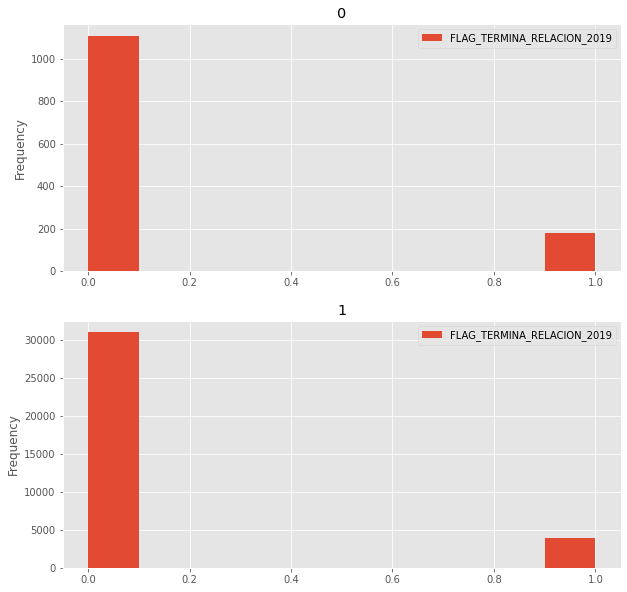

In [64]:
#Sin embargo este comportamiento no se aplica si comparamos con el FLAG_TERMINA_RELACION_2019
ax = df_2018.plot.hist(column=["FLAG_TERMINA_RELACION_2019"], by="FLAG_DIESEL", figsize=(10,10))

## Catalunya y Andalucía no tienen diferencias de comportamiento respecto al flag_termina_relacion_2019. Pero madrid parece que si influye, la que la mitad de los propietarios de Madrid terminarán su relación en 2019.

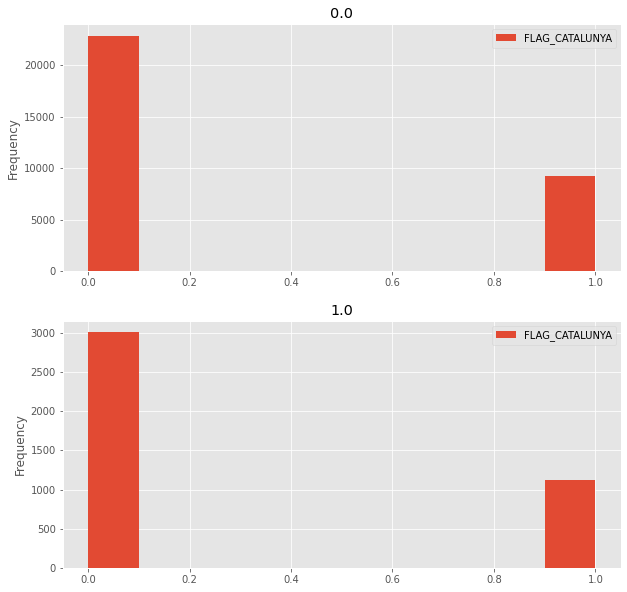

In [65]:
ax = df_2018.plot.hist(column=["FLAG_CATALUNYA"], by="FLAG_TERMINA_RELACION_2019", figsize=(10,10))

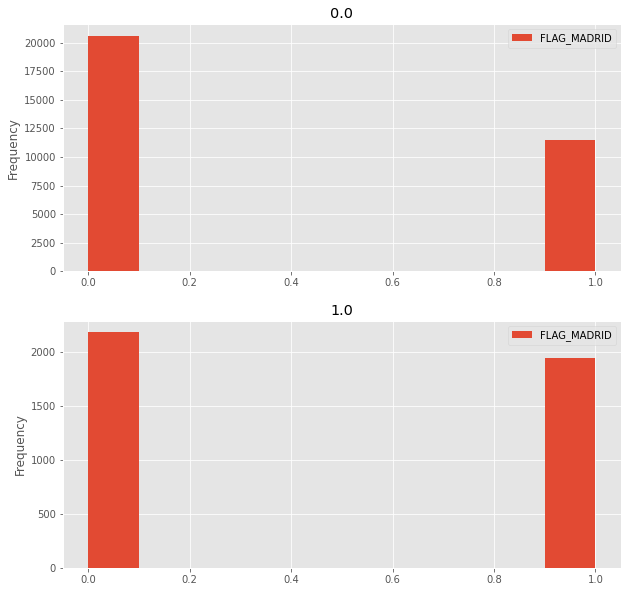

In [66]:
ax = df_2018.plot.hist(column=["FLAG_MADRID"], by="FLAG_TERMINA_RELACION_2019", figsize=(10,10))

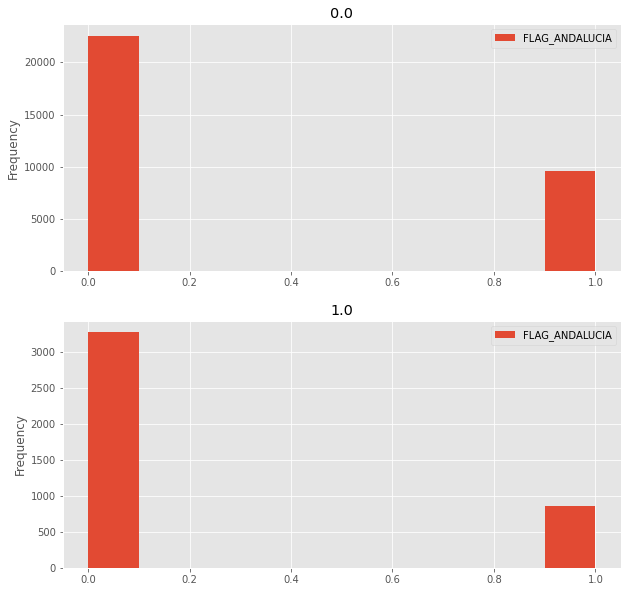

In [67]:
ax = df_2018.plot.hist(column=["FLAG_ANDALUCIA"], by="FLAG_TERMINA_RELACION_2019", figsize=(10,10))

# No hay diferencias de comportamiento por modelo

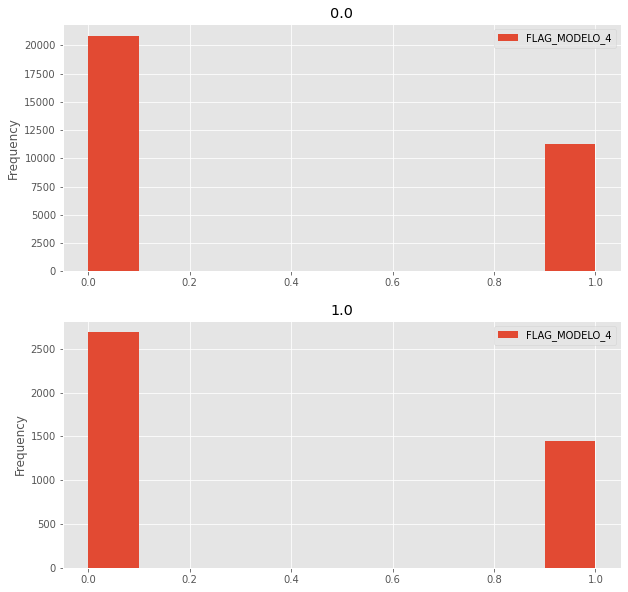

In [68]:
ax = df_2018.plot.hist(column=["FLAG_MODELO_4"], by="FLAG_TERMINA_RELACION_2019", figsize=(10,10))

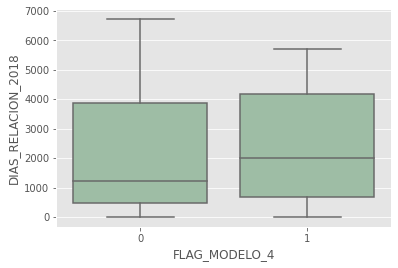

In [69]:
ax = sns.boxplot(x='FLAG_MODELO_4', y='DIAS_RELACION_2018', data=df_2018, color='#99c2a2')
#ax = df_2018.plot.hist(column=["COD_MODELO"], by="FLAG_LIFE", figsize=(10, 10))
plt.show()

## A partir de este punto hay más análisis de los que no hemos podido extraer conclusiones

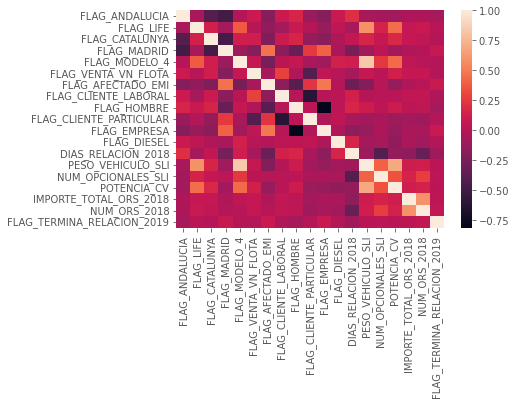

In [70]:
correlations = df_2018.corr(method='pearson', min_periods=1)
%matplotlib inline
sns.heatmap(correlations)
plt.show()

## Listado de variables que están relacionadas entre si

In [71]:
#variables que estan relacionadas
sorted_mat = correlations.unstack().sort_values()
pd.set_option('display.max_rows', None)
print(sorted_mat)
#En el listado anterior vemos que hay variables que están muy relacionadas
#FLAG_EMPRESA,FLAG_PERSONA_FISICA,FLAG_HOMBRE
#FLAG_CLIENTE_PARTICULAR, LABORAL
#Vemos una relación muy interesante que es la de DIAS_RELACION con el FLAG_DIESEL

FLAG_HOMBRE                 FLAG_EMPRESA                 -0.813432
FLAG_EMPRESA                FLAG_HOMBRE                  -0.813432
FLAG_CLIENTE_PARTICULAR     FLAG_CLIENTE_LABORAL         -0.617715
FLAG_CLIENTE_LABORAL        FLAG_CLIENTE_PARTICULAR      -0.617715
FLAG_ANDALUCIA              FLAG_MADRID                  -0.488230
FLAG_MADRID                 FLAG_ANDALUCIA               -0.488230
FLAG_CATALUNYA              FLAG_MADRID                  -0.487276
FLAG_MADRID                 FLAG_CATALUNYA               -0.487276
FLAG_CLIENTE_PARTICULAR     FLAG_VENTA_VN_FLOTA          -0.416245
FLAG_VENTA_VN_FLOTA         FLAG_CLIENTE_PARTICULAR      -0.416245
DIAS_RELACION_2018          NUM_OPCIONALES_SLI           -0.412976
NUM_OPCIONALES_SLI          DIAS_RELACION_2018           -0.412976
FLAG_CATALUNYA              FLAG_ANDALUCIA               -0.402931
FLAG_ANDALUCIA              FLAG_CATALUNYA               -0.402931
FLAG_AFECTADO_EMI           FLAG_HOMBRE                  -0.38

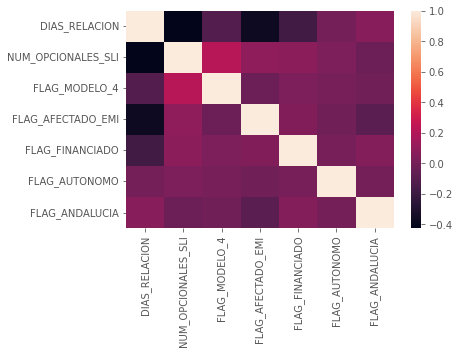

In [72]:
#Modelos por días relación
df_plot = df[['DIAS_RELACION', 'NUM_OPCIONALES_SLI','FLAG_MODELO_4','FLAG_AFECTADO_EMI','FLAG_FINANCIADO','FLAG_AUTONOMO','FLAG_ANDALUCIA']]
correlations = df_plot.corr(method='pearson', min_periods=1)
%matplotlib inline
sns.heatmap(correlations)
plt.show()

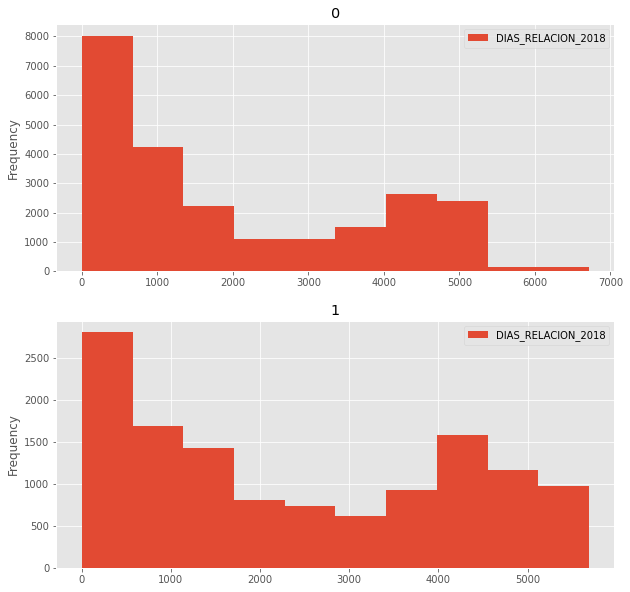

In [73]:
ax = df_2018.plot.hist(column=["DIAS_RELACION_2018"], by="FLAG_MODELO_4", figsize=(10,10))

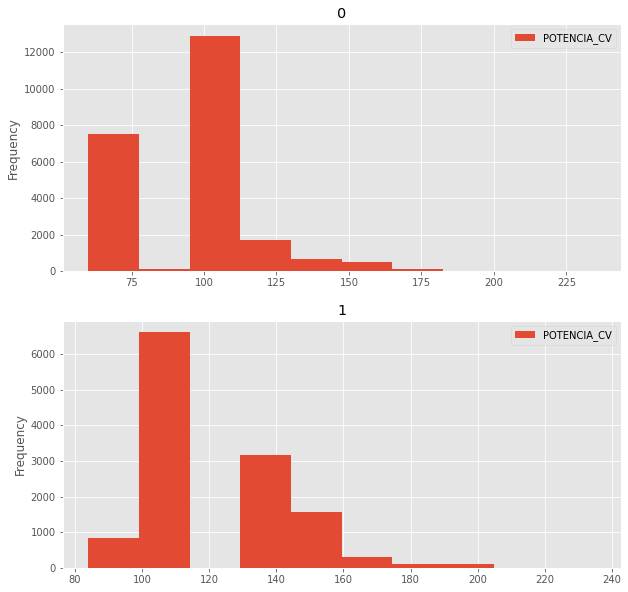

In [74]:
ax = df_2018.plot.hist(column=["POTENCIA_CV"], by="FLAG_MODELO_4", figsize=(10,10))

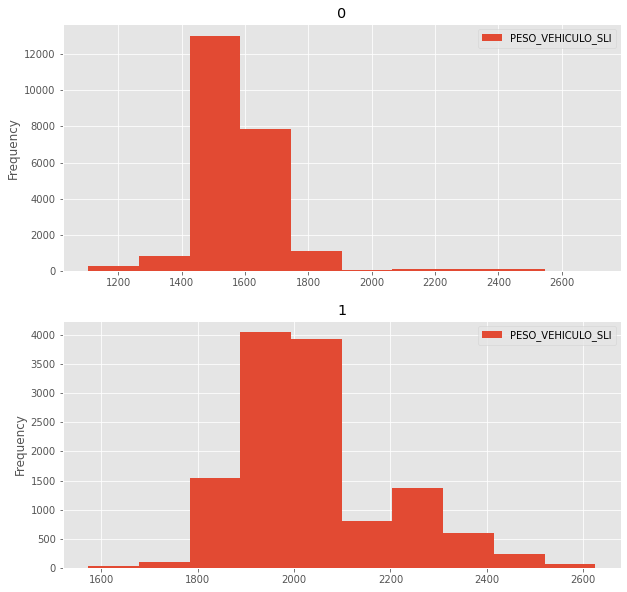

In [75]:
ax = df_2018.plot.hist(column=["PESO_VEHICULO_SLI"], by="FLAG_MODELO_4", figsize=(10,10))

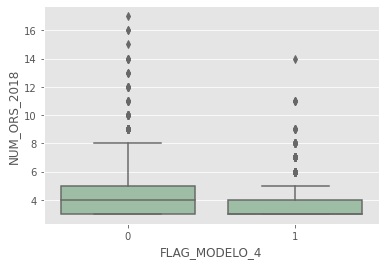

In [76]:
df_2018_test= df_2018[df_2018.NUM_ORS_2018 > 2]
ax = sns.boxplot(x='FLAG_MODELO_4', y='NUM_ORS_2018', data=df_2018_test, color='#99c2a2')

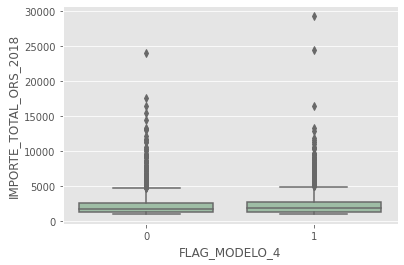

In [77]:
df_2018_test= df_2018[df_2018.IMPORTE_TOTAL_ORS_2018 > 1000]
ax = sns.boxplot(x='FLAG_MODELO_4', y='IMPORTE_TOTAL_ORS_2018', data=df_2018_test, color='#99c2a2')

### Regresión logística

In [78]:
#Copiamos DF en un PKL
df_2018.to_pickle("./df_2018.pkl")

In [79]:
# La X té totes les dades excepte la columna a predir
# La y té només la columna a predir 
X = df_2018.drop('FLAG_TERMINA_RELACION_2019',axis=1)
y = df_2018['FLAG_TERMINA_RELACION_2019']


# Dividim en train/test amb un 30% pel test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=9,stratify=y)

# Creem un objecte LogisticRegression i l'entrenem amb
# les dades de traines
regr = LogisticRegression(max_iter=500)
regr.fit(X_train,y_train)

# Amb el model creat, guardem les prediccions sobre les dades
# de test
y_pred = regr.predict(X_test)

# Amb la columna de test amb els valors reals i les nostres
# prediccions, podem obtenir un report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94      9629
         1.0       0.00      0.00      0.00      1240

    accuracy                           0.89     10869
   macro avg       0.44      0.50      0.47     10869
weighted avg       0.78      0.89      0.83     10869



C:\Users\pcarol\Anaconda3\envs\pandas_playground\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pcarol\Anaconda3\envs\pandas_playground\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pcarol\Anaconda3\envs\pandas_playground\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

## Over sample

In [83]:
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)

print(sorted(Counter(y_resampled).items()))

[(0.0, 32098), (1.0, 32098)]


In [84]:
X_resampled.shape

(64196, 18)

In [85]:
y_resampled.shape

(64196,)

## Repetim model amb noves variables

In [86]:
# Dividim en train/test amb un 30% pel test
X_train,X_test,y_train,y_test = train_test_split(X_resampled,y_resampled,test_size=0.3,random_state=9,stratify=y_resampled)

# Creem un objecte LogisticRegression i l'entrenem amb
# les dades de train
regr = LogisticRegression(max_iter=500)
regr.fit(X_train,y_train)

# Amb el model creat, guardem les prediccions sobre les dades
# de test
y_pred = regr.predict(X_test)

# Amb la columna de test amb els valors reals i les nostres
# prediccions, podem obtenir un report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.61      0.59      0.60      9630
         1.0       0.60      0.63      0.61      9629

    accuracy                           0.61     19259
   macro avg       0.61      0.61      0.61     19259
weighted avg       0.61      0.61      0.61     19259



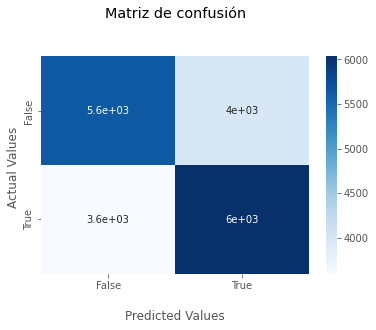

In [87]:
cf_matrix=confusion_matrix(y_test, y_pred)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Matriz de confusión\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

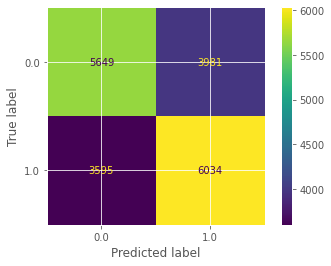

In [88]:
cm = confusion_matrix(y_test, y_pred, labels=regr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=regr.classes_)
disp.plot()